

```
# DATA MINING PROJECT
# Higher-education-predictors-of-student-retention

The aim of this project is to use a variety of deep learning and machine learning methods to predict student retention in higher education. We hope to get pre-cise classification results and compare them with the matching labels from the dataset by preprocessing the data, selecting features, and experimenting with
different techniques.

# GROUP :
ROOHAN ALI ( 21L-5629 )
ANWAAR ( 21L-5667 )
AMBREEN ( 21L-6296 )
NOOR ( 21L-5628 )
```



**IMPORTING DATASET FROM KAGGLE**

In [ ]:
!pip install kaggle

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
!mkdir -p ~/.kaggle

In [ ]:
!cp /content/drive/MyDrive/Colabnotebooks/Kaggle_API_Credentials/kaggle.json ~/.kaggle/kaggle.json

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d thedevastator/higher-education-predictors-of-student-retention

Dataset URL: https://www.kaggle.com/datasets/thedevastator/higher-education-predictors-of-student-retention
License(s): CC0-1.0
  0% 0.00/87.2k [00:00<?, ?B/s]
100% 87.2k/87.2k [00:00<00:00, 26.2MB/s]


In [ ]:
!unzip higher-education-predictors-of-student-retention.zip

Archive:  higher-education-predictors-of-student-retention.zip
  inflating: dataset.csv             


**IMPORTING LIBRARIES**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
import lightgbm as lgb
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import plot_tree
from sklearn.model_selection import RandomizedSearchCV
import time
from datetime import timedelta
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.decomposition import PCA
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import randint, uniform
from sklearn.model_selection import learning_curve
import tensorflow as tf
from sklearn.ensemble import VotingClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler

**LOADING DATASET**

In [ ]:
df = pd.read_csv('/content/dataset.csv')
df

Marital status  Application mode  Application order  Course  \
0                  1                 8                  5       2   
1                  1                 6                  1      11   
2                  1                 1                  5       5   
3                  1                 8                  2      15   
4                  2                12                  1       3   
...              ...               ...                ...     ...   
4419               1                 1                  6      15   
4420               1                 1                  2      15   
4421               1                 1                  1      12   
4422               1                 1                  1       9   
4423               1                 5                  1      15   

      Daytime/evening attendance  Previous qualification  Nacionality  \
0                              1                       1            1   
1                              1                       1            1   
2                              1                       1            1   
3                              1                       1            1   
4                              0                       1            1   
...                          ...                     ...          ...   
4419                           1                       1            1   
4420                           1                       1           19   
4421                           1                       1            1   
4422                           1                       1            1   
4423                           1                       1            9   

      Mother's qualification  Father's qualification  Mother's occupation  \
0                         13                      10                    6   
1                          1                       3                    4   
2                         22                      27                   10   
3                         23                      27                    6   
4                         22                      28                   10   
...                      ...                     ...                  ...   
4419                       1                       1                    6   
4420                       1                       1                   10   
4421                      22                      27                   10   
4422                      22                      27                    8   
4423                      23                      27                    6   

      ...  Curricular units 2nd sem (credited)  \
0     ...                                    0   
1     ...                                    0   
2     ...                                    0   
3     ...                                    0   
4     ...                                    0   
...   ...                                  ...   
4419  ...                                    0   
4420  ...                                    0   
4421  ...                                    0   
4422  ...                                    0   
4423  ...                                    0   

      Curricular units 2nd sem (enrolled)  \
0                                       0   
1                                       6   
2                                       6   
3                                       6   
4                                       6   
...                                   ...   
4419                                    6   
4420                                    6   
4421                                    8   
4422                                    5   
4423                                    6   

      Curricular units 2nd sem (evaluations)  \
0                                          0   
1                                          6   
2                                          0   
3                                        

**EXPLORING THE DATASET**

In [3]:
df.head()

Marital status  Application mode  Application order  Course  \
0               1                 8                  5       2   
1               1                 6                  1      11   
2               1                 1                  5       5   
3               1                 8                  2      15   
4               2                12                  1       3   

   Daytime/evening attendance  Previous qualification  Nacionality  \
0                           1                       1            1   
1                           1                       1            1   
2                           1                       1            1   
3                           1                       1            1   
4                           0                       1            1   

   Mother's qualification  Father's qualification  Mother's occupation  ...  \
0                      13                      10                    6  ...   
1                       1                       3                    4  ...   
2                      22                      27                   10  ...   
3                      23                      27                    6  ...   
4                      22                      28                   10  ...   

   Curricular units 2nd sem (credited)  Curricular units 2nd sem (enrolled)  \
0                                    0                                    0   
1                                    0                                    6   
2                                    0                                    6   
3                                    0                                    6   
4                                    0                                    6   

   Curricular units 2nd sem (evaluations)  \
0                                       0   
1                                       6   
2                                       0   
3                                      10   
4                                       6   

   Curricular units 2nd sem (approved)  Curricular units 2nd sem (grade)  \
0                                    0                          0.000000   
1                                    6                         13.666667   
2                                    0                          0.000000   
3                                    5                         12.400000   
4                                    6                         13.000000   

   Curricular units 2nd sem (without evaluations)  Unemployment rate  \
0                                               0               10.8   
1                                               0               13.9   
2                                               0               10.8   
3                                               0                9.4   
4                                               0               13.9   

   Inflation rate   GDP    Target  
0             1.4  1.74   Dropout  
1            -0.3  0.79  Graduate  
2             1.4  1.74   Dropout  
3            -0.8 -3.12  Graduate  
4            -0.3  0.79  Graduate  

[5 rows x 35 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 35 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Nacionality                                     4424 non-null   int64  
 7   Mother's qualification                          4424 non-null   int64  
 8   Father's qualification                          4424 non-null   int64  
 9   Mother's occupation                      

In [5]:
df.describe()

Marital status  Application mode  Application order       Course  \
count     4424.000000       4424.000000        4424.000000  4424.000000   
mean         1.178571          6.886980           1.727848     9.899186   
std          0.605747          5.298964           1.313793     4.331792   
min          1.000000          1.000000           0.000000     1.000000   
25%          1.000000          1.000000           1.000000     6.000000   
50%          1.000000          8.000000           1.000000    10.000000   
75%          1.000000         12.000000           2.000000    13.000000   
max          6.000000         18.000000           9.000000    17.000000   

       Daytime/evening attendance  Previous qualification  Nacionality  \
count                 4424.000000             4424.000000  4424.000000   
mean                     0.890823                2.531420     1.254521   
std                      0.311897                3.963707     1.748447   
min                      0.000000                1.000000     1.000000   
25%                      1.000000                1.000000     1.000000   
50%                      1.000000                1.000000     1.000000   
75%                      1.000000                1.000000     1.000000   
max                      1.000000               17.000000    21.000000   

       Mother's qualification  Father's qualification  Mother's occupation  \
count             4424.000000             4424.000000          4424.000000   
mean                12.322107               16.455244             7.317812   
std                  9.026251               11.044800             3.997828   
min                  1.000000                1.000000             1.000000   
25%                  2.000000                3.000000             5.000000   
50%                 13.000000               14.000000             6.000000   
75%                 22.000000               27.000000            10.000000   
max                 29.000000               34.000000            32.000000   

       ...  Curricular units 1st sem (without evaluations)  \
count  ...                                     4424.000000   
mean   ...                                        0.137658   
std    ...                                        0.690880   
min    ...                                        0.000000   
25%    ...                                        0.000000   
50%    ...                                        0.000000   
75%    ...                                        0.000000   
max    ...                                       12.000000   

       Curricular units 2nd sem (credited)  \
count                          4424.000000   
mean                              0.541817   
std                               1.918546   
min                               0.000000   
25%                               0.000000   
50%                               0.000000   
75%                               0.000000   
max                              19.000000   

       Curricular units 2nd sem (enrolled)  \
count                          4424.000000   
mean                              6.232143   
std                               2.195951   
min                               0.000000   
25%                               5.000000   
50%                               6.000000   
75%                               7.000000   
max                              23.000000   

       Curricular units 2nd sem (evaluations)  \
count                             4424.000000   
mean                                 8.063291   
std                                  3.947951   
min                                  0.000000   
25%                                  6.000000   
50%                                  8.000000   
75%                                 10.000000   
max                                 33.000000   

       Curricular units 2nd sem (approved)  Curricular units 2nd sem (grade)  \
count                          4424.000000        

In [6]:
df.shape

(4424, 35)

**VISUALISING NON - NUMERIC FIELDS**

In [7]:
print(df["Target"].unique())

['Dropout' 'Graduate' 'Enrolled']


# **DATA PRE-PROCESSING**

**CONVERTING NON NUMERIC TO NUMERIC**

In [8]:
df['Target'] = df['Target'].map({'Dropout' : 0, 'Enrolled': 1, 'Graduate': 2})

In [9]:
print(df["Target"].unique())

[0 2 1]


**CHECKING FOR NULL VALUES**

In [10]:
df.isnull().sum()

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrollment                                 0
International                                     0
Curricular u

**CHECKING FOR NON NUMERIC COLUMNS**

In [11]:
non_numeric_cols = df.select_dtypes(include=['object', 'category']).columns
non_numeric_cols

Index([], dtype='object')

**FILLING MISSING VALUES OF NON NUMERIC COLS WITH DEFAULT VALUES**

In [12]:
if len(non_numeric_cols) > 0:
    df[non_numeric_cols] = df[non_numeric_cols].fillna('Missing')

**HANDLING MISSING VALUES**

In [13]:
df.dropna(subset=df.select_dtypes(include=['int64', 'float64']).columns, inplace=True)
df[df.select_dtypes(include=['int64', 'float64']).columns] = df[df.select_dtypes(include=['int64', 'float64']).columns].fillna(df[df.select_dtypes(include=['int64', 'float64']).columns].mean())
df

Marital status  Application mode  Application order  Course  \
0                  1                 8                  5       2   
1                  1                 6                  1      11   
2                  1                 1                  5       5   
3                  1                 8                  2      15   
4                  2                12                  1       3   
...              ...               ...                ...     ...   
4419               1                 1                  6      15   
4420               1                 1                  2      15   
4421               1                 1                  1      12   
4422               1                 1                  1       9   
4423               1                 5                  1      15   

      Daytime/evening attendance  Previous qualification  Nacionality  \
0                              1                       1            1   
1                              1                       1            1   
2                              1                       1            1   
3                              1                       1            1   
4                              0                       1            1   
...                          ...                     ...          ...   
4419                           1                       1            1   
4420                           1                       1           19   
4421                           1                       1            1   
4422                           1                       1            1   
4423                           1                       1            9   

      Mother's qualification  Father's qualification  Mother's occupation  \
0                         13                      10                    6   
1                          1                       3                    4   
2                         22                      27                   10   
3                         23                      27                    6   
4                         22                      28                   10   
...                      ...                     ...                  ...   
4419                       1                       1                    6   
4420                       1                       1                   10   
4421                      22                      27                   10   
4422                      22                      27                    8   
4423                      23                      27                    6   

      ...  Curricular units 2nd sem (credited)  \
0     ...                                    0   
1     ...                                    0   
2     ...                                    0   
3     ...                                    0   
4     ...                                    0   
...   ...                                  ...   
4419  ...                                    0   
4420  ...                                    0   
4421  ...                                    0   
4422  ...                                    0   
4423  ...                                    0   

      Curricular units 2nd sem (enrolled)  \
0                                       0   
1                                       6   
2                                       6   
3                                       6   
4                                       6   
...                                   ...   
4419                                    6   
4420                                    6   
4421                                    8   
4422                                    5   
4423                                    6   

      Curricular units 2nd sem (evaluations)  \
0                                          0   
1                                          6   
2                                          0   
3                                        

**CORRELATION WITH TARGET COLUMN**

In [14]:
df.corr()['Target']

Marital status                                   -0.089804
Application mode                                 -0.212025
Application order                                 0.089791
Course                                            0.007841
Daytime/evening attendance                        0.075107
Previous qualification                           -0.091365
Nacionality                                      -0.004740
Mother's qualification                           -0.038346
Father's qualification                            0.000329
Mother's occupation                               0.048424
Father's occupation                               0.051702
Displaced                                         0.113986
Educational special needs                        -0.007353
Debtor                                           -0.240999
Tuition fees up to date                           0.409827
Gender                                           -0.229270
Scholarship holder                                0.2975

**ONE HOT ENCODING**

In [15]:
one_hot_encoder = OneHotEncoder()
categorical_cols = ['Marital status', 'Application mode', 'Course', 'Daytime/evening attendance', 'Previous qualification', 'Nacionality']
df_categorical = pd.get_dummies(df, columns=categorical_cols)

df_categorical

Application order  Mother's qualification  Father's qualification  \
0                     5                      13                      10   
1                     1                       1                       3   
2                     5                      22                      27   
3                     2                      23                      27   
4                     1                      22                      28   
...                 ...                     ...                     ...   
4419                  6                       1                       1   
4420                  2                       1                       1   
4421                  1                      22                      27   
4422                  1                      22                      27   
4423                  1                      23                      27   

      Mother's occupation  Father's occupation  Displaced  \
0                       6                   10          1   
1                       4                    4          1   
2                      10                   10          1   
3                       6                    4          1   
4                      10                   10          0   
...                   ...                  ...        ...   
4419                    6                    5          0   
4420                   10                   10          1   
4421                   10                   10          1   
4422                    8                    5          1   
4423                    6                   10          1   

      Educational special needs  Debtor  Tuition fees up to date  Gender  ...  \
0                             0       0                        1       1  ...   
1                             0       0                        0       1  ...   
2                             0       0                        0       1  ...   
3                             0       0                        1       0  ...   
4                             0       0                        1       0  ...   
...                         ...     ...                      ...     ...  ...   
4419                          0       0                        1       1  ...   
4420                          0       1                        0       0  ...   
4421                          0       0                        1       0  ...   
4422                          0       0                        1       0  ...   
4423                          0       0                        1       0  ...   

      Nacionality_12  Nacionality_13  Nacionality_14  Nacionality_15  \
0              False           False           False           False   
1              False           False           False           False   
2              False           False           False           False   
3              False           False           False           False   
4              False           False           False           False   
...              ...             ...             ...             ...   
4419           False           False           False           False   
4420           False           False           False           False   
4421           False           False           False           False   
4422           False           False           False           False   
4423           False           False           False           False   

      Nacionality_16  Nacionality_17  Nacionality_18  Nacionality_19  \
0              False           False           False           False   
1              False           False           False           False   
2              False           False           False           False   
3              False           False           False           False   
4              False           False           False           False   
...              ...             ...             ...             ...   
4419           False          

**SCALING NUMERICAL VALUES**

In [16]:
scaler = StandardScaler()
numerical_cols = ['Age at enrollment', 'Curricular units 1st sem (credited)', 'Curricular units 1st sem (enrolled)', 'Curricular units 1st sem (evaluations)']
df_numerical = scaler.fit_transform(df[numerical_cols])

df_numerical

array([[-0.43036282, -0.30081306, -2.52855964, -1.98606822],
       [-0.56216796, -0.30081306, -0.10910515, -0.55019202],
       [-0.56216796, -0.30081306, -0.10910515, -1.98606822],
       ...,
       [ 0.8876885 , -0.30081306,  0.29413727, -0.07156661],
       [-0.43036282, -0.30081306, -0.51234756, -0.78950472],
       [-0.16675256, -0.30081306, -0.10910515, -0.07156661]])

**CONCATENATE CATEGORICAL AND NUMERICAL COLS**

In [17]:
df_preprocessed = pd.concat([df_categorical, pd.DataFrame(df_numerical, columns=numerical_cols)], axis=1)
df_preprocessed

Application order  Mother's qualification  Father's qualification  \
0                     5                      13                      10   
1                     1                       1                       3   
2                     5                      22                      27   
3                     2                      23                      27   
4                     1                      22                      28   
...                 ...                     ...                     ...   
4419                  6                       1                       1   
4420                  2                       1                       1   
4421                  1                      22                      27   
4422                  1                      22                      27   
4423                  1                      23                      27   

      Mother's occupation  Father's occupation  Displaced  \
0                       6                   10          1   
1                       4                    4          1   
2                      10                   10          1   
3                       6                    4          1   
4                      10                   10          0   
...                   ...                  ...        ...   
4419                    6                    5          0   
4420                   10                   10          1   
4421                   10                   10          1   
4422                    8                    5          1   
4423                    6                   10          1   

      Educational special needs  Debtor  Tuition fees up to date  Gender  ...  \
0                             0       0                        1       1  ...   
1                             0       0                        0       1  ...   
2                             0       0                        0       1  ...   
3                             0       0                        1       0  ...   
4                             0       0                        1       0  ...   
...                         ...     ...                      ...     ...  ...   
4419                          0       0                        1       1  ...   
4420                          0       1                        0       0  ...   
4421                          0       0                        1       0  ...   
4422                          0       0                        1       0  ...   
4423                          0       0                        1       0  ...   

      Nacionality_16  Nacionality_17  Nacionality_18  Nacionality_19  \
0              False           False           False           False   
1              False           False           False           False   
2              False           False           False           False   
3              False           False           False           False   
4              False           False           False           False   
...              ...             ...             ...             ...   
4419           False           False           False           False   
4420           False           False           False            True   
4421           False           False           False           False   
4422           False           False           False           False   
4423           False           False           False           False   

      Nacionality_20  Nacionality_21  Age at enrollment  \
0              False           False          -0.430363   
1              False           False          -0.562168   
2              False           False          -0.562168   
3              False           False          -0.430363   
4              False           False           2.864765   
...              ...             ...                ...   
4419           False           False          -0.562168   
4420           False           False          -0.693973   
442

# **FEATURE ENGINEERING**

**SPEARMAN'S CORRELATION**

In [18]:
spearman_corr = df.corr(method='spearman')['Target'].sort_values(ascending=False)

# Displaying the Spearman's Rank Correlation
print("Spearman's Rank Correlation with Target:")
print(spearman_corr)

Spearman's Rank Correlation with Target:
Target                                            1.000000
Curricular units 2nd sem (approved)               0.654049
Curricular units 1st sem (approved)               0.594194
Curricular units 2nd sem (grade)                  0.559820
Curricular units 1st sem (grade)                  0.497341
Tuition fees up to date                           0.400283
Scholarship holder                                0.301103
Curricular units 2nd sem (enrolled)               0.241456
Curricular units 1st sem (enrolled)               0.230576
Displaced                                         0.113241
Application order                                 0.102185
Daytime/evening attendance                        0.073066
GDP                                               0.053497
Curricular units 2nd sem (credited)               0.035004
Mother's occupation                               0.032700
Father's occupation                               0.032265
Curricular unit

**DROPPING UNNECCESARY COLUMNS**

In [19]:
df = df.drop(columns=['Nacionality', 'International', 'Educational special needs', 'Course',
                      'Mother\'s qualification','Father\'s qualification',
                      'Mother\'s occupation', 'Father\'s occupation',
                      'Curricular units 1st sem (credited)', 'Curricular units 1st sem (evaluations)',
                      'Unemployment rate', 'Inflation rate', 'GDP'], axis=1)
df.head()

Marital status  Application mode  Application order  \
0               1                 8                  5   
1               1                 6                  1   
2               1                 1                  5   
3               1                 8                  2   
4               2                12                  1   

   Daytime/evening attendance  Previous qualification  Displaced  Debtor  \
0                           1                       1          1       0   
1                           1                       1          1       0   
2                           1                       1          1       0   
3                           1                       1          1       0   
4                           0                       1          0       0   

   Tuition fees up to date  Gender  Scholarship holder  ...  \
0                        1       1                   0  ...   
1                        0       1                   0  ...   
2                        0       1                   0  ...   
3                        1       0                   0  ...   
4                        1       0                   0  ...   

   Curricular units 1st sem (approved)  Curricular units 1st sem (grade)  \
0                                    0                          0.000000   
1                                    6                         14.000000   
2                                    0                          0.000000   
3                                    6                         13.428571   
4                                    5                         12.333333   

   Curricular units 1st sem (without evaluations)  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Curricular units 2nd sem (credited)  Curricular units 2nd sem (enrolled)  \
0                                    0                                    0   
1                                    0                                    6   
2                                    0                                    6   
3                                    0                                    6   
4                                    0                                    6   

   Curricular units 2nd sem (evaluations)  \
0                                       0   
1                                       6   
2                                       0   
3                                      10   
4                                       6   

   Curricular units 2nd sem (approved)  Curricular units 2nd sem (grade)  \
0                                    0                          0.000000   
1                                    6                         13.666667   
2                                    0                          0.000000   
3                                    5                         12.400000   
4                                    6                         13.000000   

   Curricular units 2nd sem (without evaluations)  Target  
0                                               0       0  
1                                               0       2  
2                                               0       0  
3                                               0       2  
4                                               0       2  

[5 rows x 22 columns]

In [ ]:
# Create new columns for interaction and total curricular units
df['Interaction_CU_1st_2nd_Approved'] = df['Curricular units 1st sem (approved)'] * df['Curricular units 2nd sem (approved)']
df['Interaction_CU_1st_2nd_Grade'] = df['Curricular units 1st sem (grade)'] * df['Curricular units 2nd sem (grade)']

df['total_cu_approved'] = df['Curricular units 1st sem (approved)'] + df['Curricular units 2nd sem (approved)']
df['total_cu_grade'] = (df['Curricular units 1st sem (grade)'] + df['Curricular units 2nd sem (grade)']) / 2
df

Marital status  Application mode  Application order  \
0                  1                 8                  5   
1                  1                 6                  1   
2                  1                 1                  5   
3                  1                 8                  2   
4                  2                12                  1   
...              ...               ...                ...   
4419               1                 1                  6   
4420               1                 1                  2   
4421               1                 1                  1   
4422               1                 1                  1   
4423               1                 5                  1   

      Daytime/evening attendance  Previous qualification  Displaced  Debtor  \
0                              1                       1          1       0   
1                              1                       1          1       0   
2                              1                       1          1       0   
3                              1                       1          1       0   
4                              0                       1          0       0   
...                          ...                     ...        ...     ...   
4419                           1                       1          0       0   
4420                           1                       1          1       1   
4421                           1                       1          1       0   
4422                           1                       1          1       0   
4423                           1                       1          1       0   

      Tuition fees up to date  Gender  Scholarship holder  ...  \
0                           1       1                   0  ...   
1                           0       1                   0  ...   
2                           0       1                   0  ...   
3                           1       0                   0  ...   
4                           1       0                   0  ...   
...                       ...     ...                 ...  ...   
4419                        1       1                   0  ...   
4420                        0       0                   0  ...   
4421                        1       0                   1  ...   
4422                        1       0                   1  ...   
4423                        1       0                   0  ...   

      Curricular units 2nd sem (enrolled)  \
0                                       0   
1                                       6   
2                                       6   
3                                       6   
4                                       6   
...                                   ...   
4419                                    6   
4420                                    6   
4421                                    8   
4422                                    5   
4423                                    6   

      Curricular units 2nd sem (evaluations)  \
0                                          0   
1                                          6   
2                                          0   
3                                         10   
4                                          6   
...                                      ...   
4419                                       8   
4420                                       6   
4421                                       9   
4422                                       6   
4423                                       6   

      Curricular units 2nd sem (approved)  Curricular units 2nd sem (grade)  \
0                                       0                          0.000000   
1                                       6                         13.666667   
2                                       0                          0.000000   
3                                       5                         12.400000   
4                 

**Dropping the original features to reduce multi-collinearity**


In [ ]:
columns_to_drop = ['Curricular units 1st sem (approved)', 'Curricular units 2nd sem (approved)',
                   'Curricular units 1st sem (grade)', 'Curricular units 2nd sem (grade)',]
df.drop(columns_to_drop, axis=1, inplace=True)
df

Marital status  Application mode  Application order  \
0                  1                 8                  5   
1                  1                 6                  1   
2                  1                 1                  5   
3                  1                 8                  2   
4                  2                12                  1   
...              ...               ...                ...   
4419               1                 1                  6   
4420               1                 1                  2   
4421               1                 1                  1   
4422               1                 1                  1   
4423               1                 5                  1   

      Daytime/evening attendance  Previous qualification  Displaced  Debtor  \
0                              1                       1          1       0   
1                              1                       1          1       0   
2                              1                       1          1       0   
3                              1                       1          1       0   
4                              0                       1          0       0   
...                          ...                     ...        ...     ...   
4419                           1                       1          0       0   
4420                           1                       1          1       1   
4421                           1                       1          1       0   
4422                           1                       1          1       0   
4423                           1                       1          1       0   

      Tuition fees up to date  Gender  Scholarship holder  ...  \
0                           1       1                   0  ...   
1                           0       1                   0  ...   
2                           0       1                   0  ...   
3                           1       0                   0  ...   
4                           1       0                   0  ...   
...                       ...     ...                 ...  ...   
4419                        1       1                   0  ...   
4420                        0       0                   0  ...   
4421                        1       0                   1  ...   
4422                        1       0                   1  ...   
4423                        1       0                   0  ...   

      Curricular units 1st sem (without evaluations)  \
0                                                  0   
1                                                  0   
2                                                  0   
3                                                  0   
4                                                  0   
...                                              ...   
4419                                               0   
4420                                               0   
4421                                               0   
4422                                               0   
4423                                               0   

      Curricular units 2nd sem (credited)  \
0                                       0   
1                                       0   
2                                       0   
3                                       0   
4                                       0   
...                                   ...   
4419                                    0   
4420                                    0   
4421                                    0   
4422                                    0   
4423                                    0   

      Curricular units 2nd sem (enrolled)  \
0                                       0   
1                                       6   
2                                       6   
3                                       6   
4                                       6   
...                                   ...   
44

# **MODELS EVALUATION**

**MACHINE LEARNING MODELS**

**TEST TRAIN SPLIT**

In [ ]:
# Preparing the data: Separating features and target label
X = df.drop('Target', axis=1)
y = df['Target']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train :")
print(" ")
print(X_train)
print(" ")
print("y_train :")
print(" ")
print(y_train)

X_train :
 
      Marital status  Application mode  Application order  \
3383               4                 4                  1   
2840               1                12                  1   
564                1                 1                  6   
1786               2                12                  1   
3900               1                 1                  3   
...              ...               ...                ...   
3444               1                 1                  2   
466                1                 1                  1   
3092               1                 1                  1   
3772               1                 1                  4   
860                1                 9                  2   

      Daytime/evening attendance  Previous qualification  Displaced  Debtor  \
3383                           1                       3          0       0   
2840                           1                       1          0       0   
564               

In [ ]:
# Encode the target variable
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['Target'])

# Define features (X)
X = df.drop('Target', axis=1)

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the train and test sets
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (3539, 34)
X_test shape: (885, 34)
y_train shape: (3539,)
y_test shape: (885,)


**SCALING THE DATA**

In [ ]:
# Standardizing features by removing the mean and scaling to unit variance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

**IMPLEMENTING PCA**

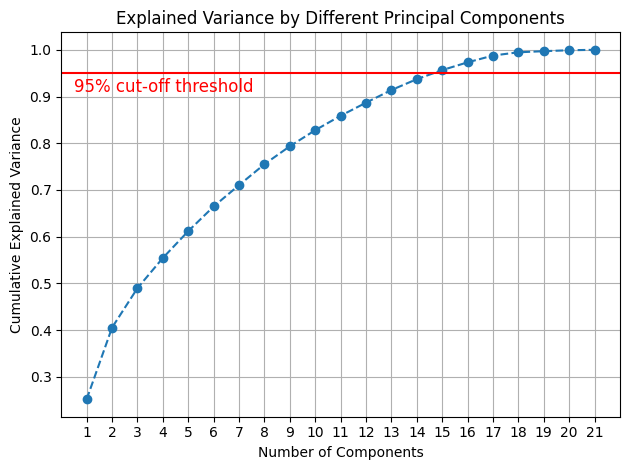

In [ ]:
# Fitting PCA on the training
pca = PCA().fit(X_train_scaled)

# Visualizing the cumulative explained variance to determine the number of components needed
plt.figure()
plt.plot(np.arange(1, len(pca.explained_variance_ratio_) + 1),
         np.cumsum(pca.explained_variance_ratio_),
         marker='o', linestyle='--')
plt.title('Explained Variance by Different Principal Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)

# Drawing a horizontal line at 95% cumulative explained variance
plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.91, '95% cut-off threshold', color = 'red', fontsize=12)

plt.xticks(np.arange(1, len(pca.explained_variance_ratio_) + 1, step=1))

plt.grid(True)
plt.tight_layout()
plt.show()

In [86]:
models_config = {
    'Gradient Boosting': {
        'pipeline': ImbPipeline(steps=[
            ('scaler', StandardScaler()),
            ('smote', SMOTE(random_state=42)),
            ('pca', PCA(n_components=0.95, random_state=42)),
            ('model', GradientBoostingClassifier(random_state=42))
        ]),
        'params': {
            'model__n_estimators': [100, 150, 200],
            'model__learning_rate': [0.01, 0.05],
            'model__max_depth': [2, 3, 4],
            'model__subsample': [0.5, 0.75, 1.0],
            'model__validation_fraction': [0.1, 0.2],
            'model__n_iter_no_change': [10, 20, 30],
            'model__tol': [1e-4],
        }
    },
    'Random Forest': {
        'pipeline': ImbPipeline(steps=[
            ('scaler', StandardScaler()),
            ('smote', SMOTE(random_state=42)),
            ('pca', PCA(n_components=0.95, random_state=42)),
            ('model', RandomForestClassifier(random_state=42))
        ]),
        'params': {
            'model__n_estimators': [100, 125],
            'model__max_depth': [3, 4],
            'model__min_samples_split': [4, 6],
            'model__min_samples_leaf': [2, 3],
            'model__max_features': ['log2'],
        }
    },
    'Logistic Regression': {
        'pipeline': ImbPipeline(steps=[
            ('scaler', StandardScaler()),
            ('smote', SMOTE(random_state=42)),
            ('pca', PCA(n_components=0.95, random_state=42)),
            ('model', LogisticRegression(random_state=42))
        ]),
        'params': {
            'model__C': [0.005, 0.01, 0.05],
            'model__penalty': ['l1', 'l2'],
            'model__solver': ['liblinear'],
        }
    },
    'SVM': {
        'pipeline': ImbPipeline(steps=[
            ('scaler', StandardScaler()),
            ('smote', SMOTE(random_state=42)),
            ('pca', PCA(n_components=0.95, random_state=42)),
            ('model', SVC(probability=True, random_state=42))
        ]),
        'params': {
            'model__C': uniform(0.5, 2),
            'model__kernel': ['rbf', 'linear'],
        }
    },
    'KNN': {
        'pipeline': ImbPipeline(steps=[
            ('scaler', StandardScaler()),
            ('smote', SMOTE(random_state=42)),
            ('pca', PCA(n_components=0.95, random_state=42)),
            ('model', KNeighborsClassifier())
        ]),
        'params': {
            'model__n_neighbors': randint(8, 14),
            'model__weights': ['uniform'],
        }
    },
    'Linear Regression': {
        'pipeline': Pipeline(steps=[
            ('scaler', StandardScaler()),
            ('model', LinearRegression())
        ]),
        'params': {
            'model__fit_intercept': [True, False],
            'model__copy_X': [True, False],
        }
     },
    'Decision Tree': {
        'pipeline': Pipeline(steps=[
            ('scaler', StandardScaler()),
            ('model', DecisionTreeClassifier(random_state=42))
        ]),
        'params': {
            'model__criterion': ['gini', 'entropy'],
            'model__splitter': ['best', 'random'],
            'model__max_depth': [None, 5, 10],
            'model__min_samples_split': [2, 5, 10],
            'model__min_samples_leaf': [1, 2, 4],
            'model__min_weight_fraction_leaf': [0., 0.1, 0.2],
        }
    },
    'Mini Batch Gradient Descent': {
        'pipeline': Pipeline(steps=[
            ('scaler', StandardScaler()),
            ('model', SGDClassifier(random_state=42))
        ]),
        'params': {
            'model__loss': ['hinge', 'log', 'modified_huber'],
            'model__penalty': ['l2', 'elasticnet'],
            'model__alpha': [0.0001, 0.001, 0.01],
            'model__learning_rate': ['constant', 'optimal', 'invscaling'],
            'model__max_iter': [100, 500, 1000],
            'model__early_stopping': [True, False],
        }
    },
}

# Configuring learning curves to identify if the models are underfitting or overfitting
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    plt.show()

Starting search for: Gradient Boosting
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Test score for Gradient Boosting: 0.7107
Training Score for Gradient Boosting: 0.7530
Search completed for Gradient Boosting. Time taken: 0:03:48
Best parameters for Gradient Boosting: {'model__validation_fraction': 0.1, 'model__tol': 0.0001, 'model__subsample': 0.5, 'model__n_iter_no_change': 10, 'model__n_estimators': 150, 'model__max_depth': 2, 'model__learning_rate': 0.05}


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


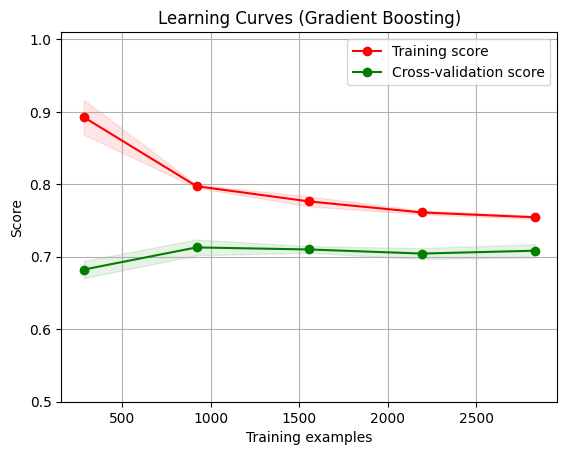

Starting search for: Random Forest
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Test score for Random Forest: 0.6903
Training Score for Random Forest: 0.7225
Search completed for Random Forest. Time taken: 0:00:27
Best parameters for Random Forest: {'model__n_estimators': 125, 'model__min_samples_split': 4, 'model__min_samples_leaf': 3, 'model__max_features': 'log2', 'model__max_depth': 4}


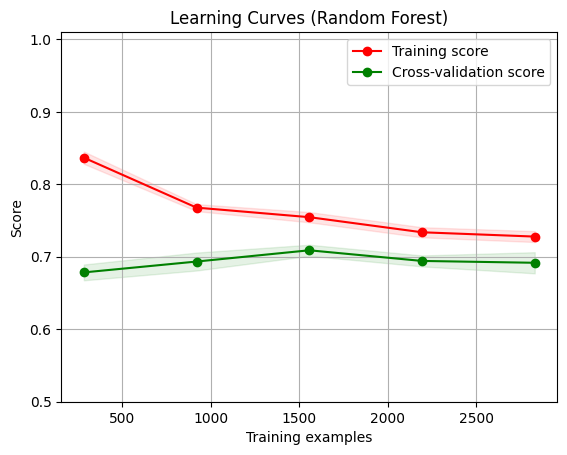

Starting search for: Logistic Regression
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Test score for Logistic Regression: 0.7355
Training Score for Logistic Regression: 0.7355
Search completed for Logistic Regression. Time taken: 0:00:02
Best parameters for Logistic Regression: {'model__solver': 'liblinear', 'model__penalty': 'l2', 'model__C': 0.05}


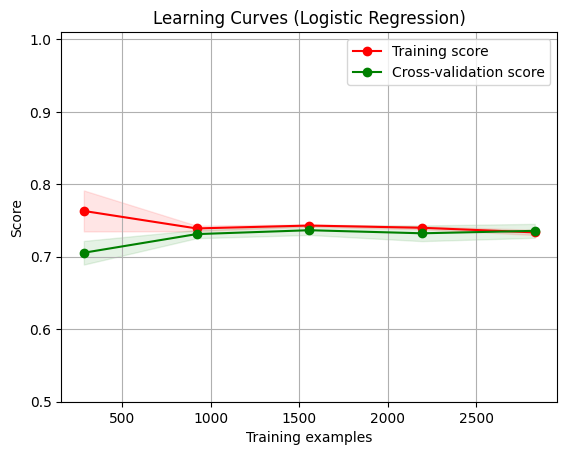

Starting search for: SVM
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Test score for SVM: 0.7231
Training Score for SVM: 0.7265
Search completed for SVM. Time taken: 0:02:55
Best parameters for SVM: {'model__C': 0.8668695797323276, 'model__kernel': 'linear'}


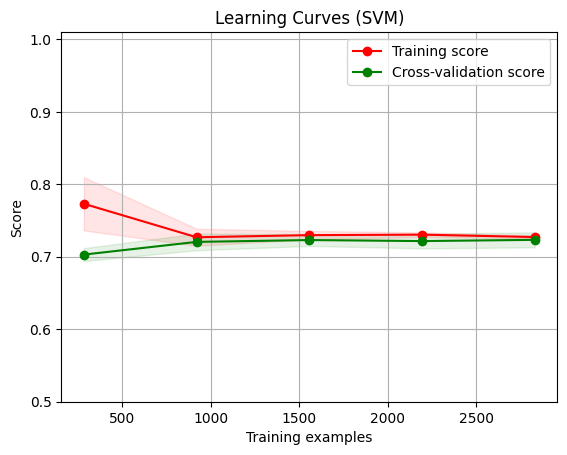

Starting search for: KNN
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Test score for KNN: 0.6539
Training Score for KNN: 0.7561
Search completed for KNN. Time taken: 0:00:05
Best parameters for KNN: {'model__n_neighbors': 9, 'model__weights': 'uniform'}


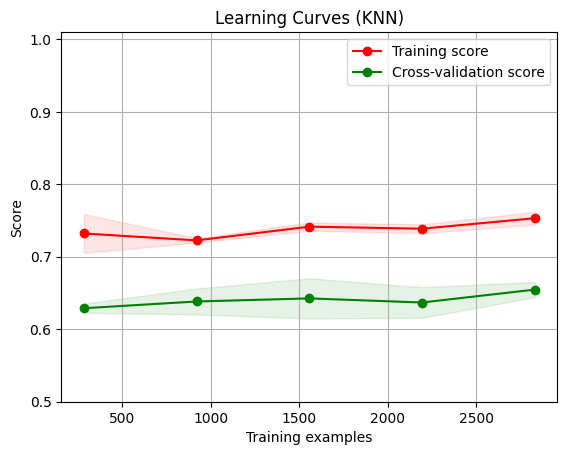

Starting search for: Linear Regression
Fitting 5 folds for each of 4 candidates, totalling 20 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 4 is smaller than n_iter=6. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.

Test score for Linear Regression: nan


ValueError: Classification metrics can't handle a mix of multiclass and continuous targets

In [87]:
best_models = {}
start_time = time.time()

# Performing RandomizedSearchCV
for name, config in models_config.items():
    print(f"Starting search for: {name}")
    search_start_time = time.time()

    search = RandomizedSearchCV(config['pipeline'], config['params'], n_iter=6, cv=5, scoring='accuracy', random_state=42, verbose=1)
    search.fit(X_train, y_train)

    best_models[name] = search.best_estimator_
    print(f"Test score for {name}: {search.best_score_:.4f}")

    # Comparing training set performance to the best CV score
    training_score = search.score(X_train, y_train)
    print(f"Training Score for {name}: {training_score:.4f}")

    elapsed_time = int(time.time() - search_start_time)
    print(f"Search completed for {name}. Time taken: {str(timedelta(seconds=elapsed_time))}")

    # Displaying the best parameters for the current model
    print(f"Best parameters for {name}: {search.best_params_}")

    # Plotting the learning curve for the best estimator
    plot_learning_curve(search.best_estimator_, f"Learning Curves ({name})", X_train, y_train, ylim=(0.5, 1.01), cv=5, n_jobs=4)

overall_time = int(time.time() - start_time)
print(f"Total time for all model searches: {str(timedelta(seconds=overall_time))}")

**LINEAR REGRESSION MSE , RSE**

In [ ]:
# Initialize Linear Regression model
linear_reg = LinearRegression()

# Fit the model on the training data
linear_reg.fit(X_train, y_train)

# Predict on the testing data
y_pred_linear = linear_reg.predict(X_test)

# Evaluate the model
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

print(f"Mean Squared Error (Linear Regression): {mse_linear}")
print(f"R-squared Score (Linear Regression): {r2_linear}")

Mean Squared Error (Linear Regression): 0.3477688131018008
R-squared Score (Linear Regression): 0.5738623364065266


In [ ]:
from sklearn.metrics import confusion_matrix

# Train the logistic regression model
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

# Predict on the test set
y_pred_lr = lr_model.predict(X_test)

# Calculate accuracy, classification report, and confusion matrix
accuracy = lr_model.score(X_test, y_test)
print("Linear Regression Accuracy:", accuracy)

# Calculate confusion matrix
confusion_matrix = confusion_matrix(y_test, y_pred_lr)
print("Linear Regression Confusion Matrix:")
print(confusion_matrix)

print("Linear Regression Classification Report:")
print(classification_report(y_test, y_pred_lr))

Linear Regression Accuracy: 0.7548022598870057
Linear Regression Confusion Matrix:
[[248  19  49]
 [ 43  37  71]
 [ 14  21 383]]
Linear Regression Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.78      0.80       316
           1       0.48      0.25      0.32       151
           2       0.76      0.92      0.83       418

    accuracy                           0.75       885
   macro avg       0.69      0.65      0.65       885
weighted avg       0.73      0.75      0.73       885



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
y_pred_linear_scratch = lr_model.predict(X_test)

**LINE PLOT OF LINEAR REGRESSION**

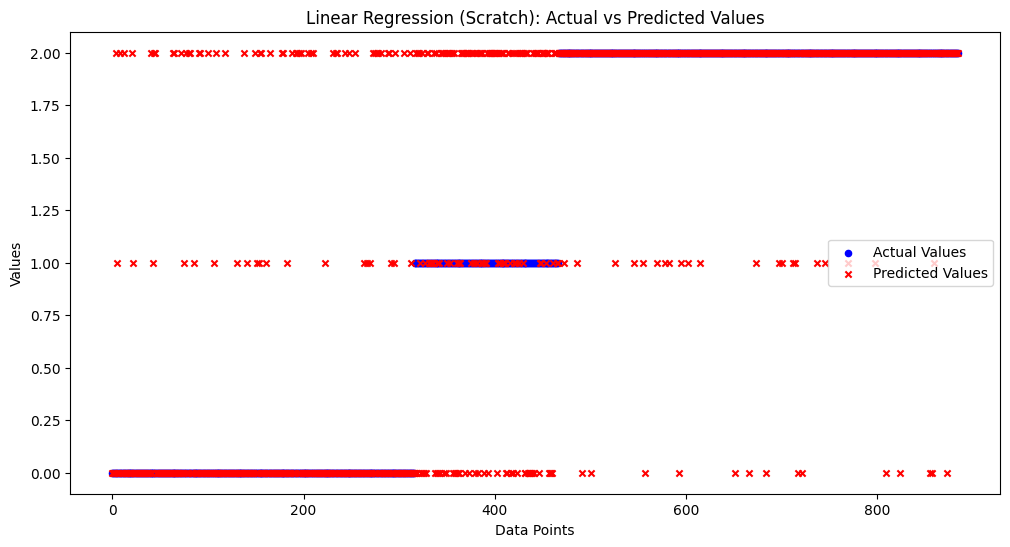

In [ ]:
sorted_idx = np.argsort(y_test)

# Line plot of actual vs sorted predicted values
plt.figure(figsize=(12, 6))
plt.scatter(range(len(y_test)), y_test[sorted_idx], label='Actual Values', color='blue', marker='o', s=20)
plt.scatter(range(len(y_test)), y_pred_linear_scratch[sorted_idx], label='Predicted Values', color='red', marker='x', s=20)
plt.xlabel('Data Points')
plt.ylabel('Values')
plt.title('Linear Regression (Scratch): Actual vs Predicted Values')
plt.legend()
plt.show()

**LOGISTIC REGRESSION**

In [ ]:
# Initialize Logistic Regression model
logistic_reg = LogisticRegression(max_iter=10000)

# Fit the model on the training data
logistic_reg.fit(X_train, y_train)

# Predict on the testing data
y_pred_logistic = logistic_reg.predict(X_test)

# Evaluate the model
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
print(f"Accuracy Score (Logistic Regression): {accuracy_logistic}")

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred_logistic))

Accuracy Score (Logistic Regression): 0.7559322033898305
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.78      0.80       316
           1       0.49      0.25      0.33       151
           2       0.76      0.92      0.83       418

    accuracy                           0.76       885
   macro avg       0.69      0.65      0.65       885
weighted avg       0.73      0.76      0.74       885



**LINE PLOT FOR LOGISTIC REGRESSION**

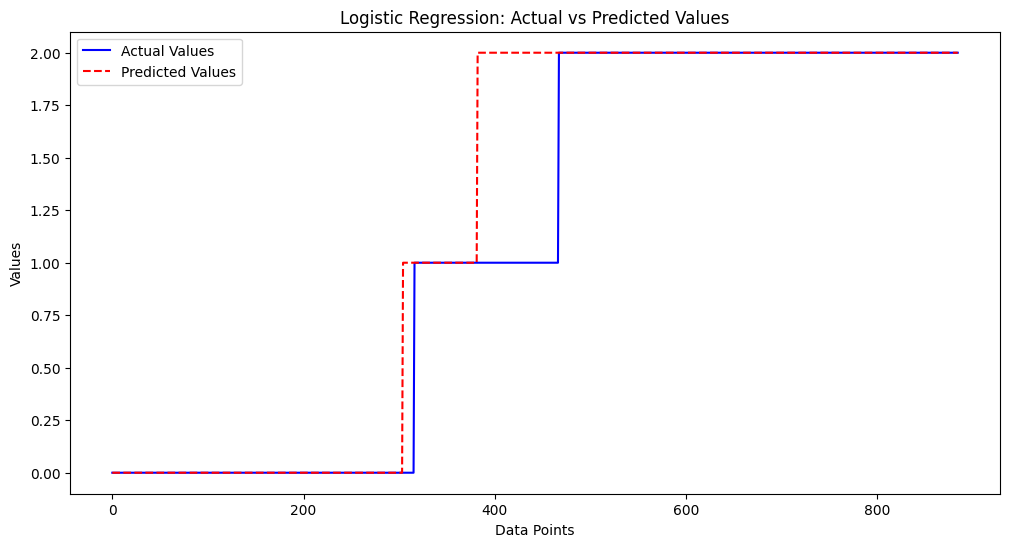

In [ ]:
# Line plot of actual vs predicted values
plt.figure(figsize=(12, 6))
plt.plot(sorted(y_test), label='Actual Values', color='blue')
plt.plot(sorted(y_pred_logistic), label='Predicted Values', color='red', linestyle='--')
plt.xlabel('Data Points')
plt.ylabel('Values')
plt.title('Logistic Regression: Actual vs Predicted Values')
plt.legend()
plt.show()


**DECISION TREE**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

class DecisionTree:
    def __init__(self):
        self.tree = None

    def fit(self, X_train, y_train):
        self.tree = DecisionTreeClassifier(random_state=42).fit(X_train, y_train)

    def predict(self, X_test):
        return self.tree.predict(X_test)

def evaluate_decision_tree(X_train, y_train, X_test, y_test):
    # Initialize Decision Tree model
    dt_model = DecisionTree()

    # Fit the model on the training data
    dt_model.fit(X_train, y_train)

    # Predict on the testing data
    y_pred_dt = dt_model.predict(X_test)

    # Evaluate the model (accuracy)
    accuracy_dt = accuracy_score(y_test, y_pred_dt)
    print(f"Accuracy Score (Decision Tree): {accuracy_dt}")

    # Evaluate the model (classification report)
    print("Classification Report:")
    class_report = classification_report(y_test, y_pred_dt, output_dict=True)
    for class_name, class_data in class_report.items():
        print(f"{class_name}: {class_data}")

    # Visualize the decision tree
    plt.figure(figsize=(20, 10))
    class_names = [str(i) for i in np.unique(y_train)]
    plot_tree(dt_model.tree, feature_names=X_train.columns, class_names=class_names, filled=True, fontsize=10)
    plt.title('Decision Tree Visualization')
    plt.show()

Accuracy Score (Decision Tree): 0.6915254237288135
Classification Report:
0: {'precision': 0.7481751824817519, 'recall': 0.6487341772151899, 'f1-score': 0.6949152542372882, 'support': 316}
1: {'precision': 0.391304347826087, 'recall': 0.41721854304635764, 'f1-score': 0.40384615384615385, 'support': 151}
2: {'precision': 0.7644444444444445, 'recall': 0.8229665071770335, 'f1-score': 0.7926267281105992, 'support': 418}
accuracy: 0.6915254237288135
macro avg: {'precision': 0.6346413249174278, 'recall': 0.6296397424795269, 'f1-score': 0.6304627120646804, 'support': 885}
weighted avg: {'precision': 0.6949695954392661, 'recall': 0.6915254237288135, 'f1-score': 0.6914033468022405, 'support': 885}


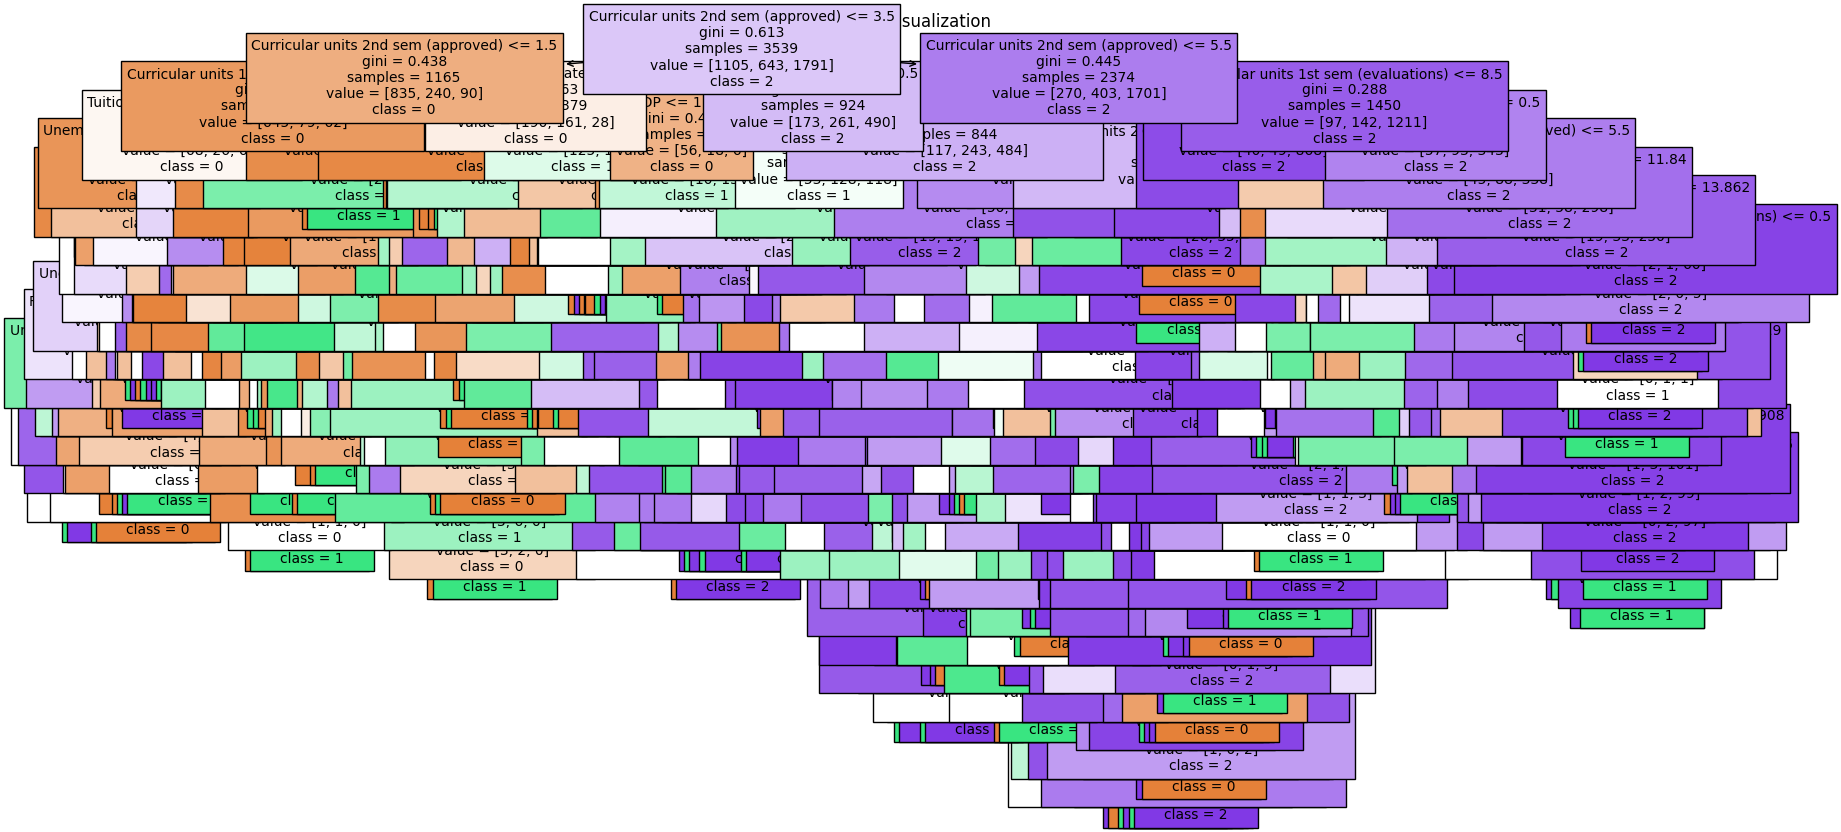

In [ ]:
evaluate_decision_tree(X_train, y_train, X_test, y_test)

**LINE GRAPH FOR DECISION TREE**

NameError: name 'y_pred_dt' is not defined

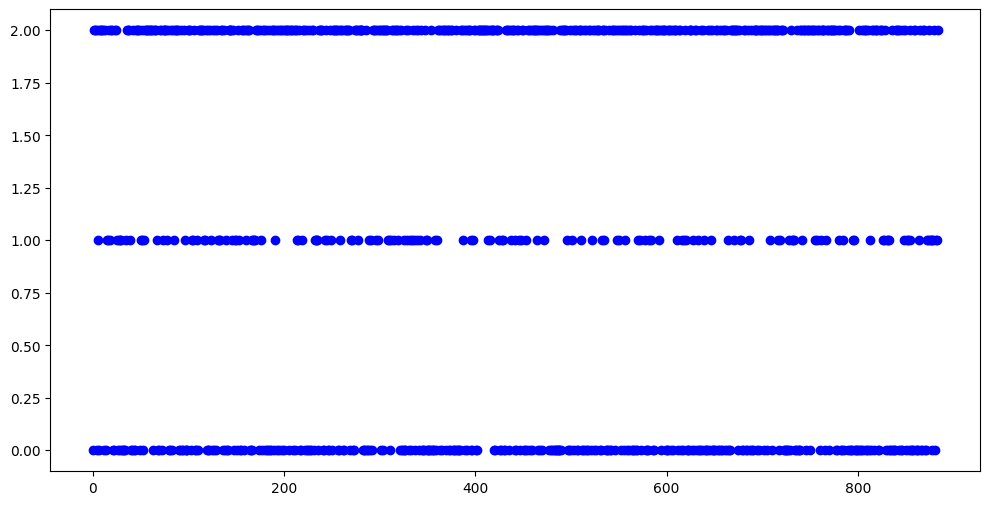

In [ ]:
# Line plot of actual vs predicted values with markers
plt.figure(figsize=(12, 6))
plt.scatter(range(len(y_test)), y_test, label='Actual Values', color='blue', marker='o')
plt.scatter(range(len(y_test)), y_pred_dt, label='Predicted Values', color='red', marker='x')
plt.xlabel('Data Points')
plt.ylabel('Values')
plt.title('Decision Tree: Actual vs Predicted Values')
plt.legend()
plt.show()

# **MINI BATCH GRADIENT DESCENT**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# Create a LogisticRegression object with the 'lbfgs' solver (which uses batch gradient descent)
logreg = LogisticRegression(solver='lbfgs', max_iter=1000)

# Fit the model to the training data
logreg.fit(X_train, y_train)

# Evaluate the model on the testing data
accuracy = logreg.score(X_test, y_test)

print(f"Accuracy (batch gradient descent): {accuracy:.3f}")

# Create a LogisticRegression object with the 'sag' solver (which uses mini-batch gradient descent)
logreg = LogisticRegression(solver='sag', max_iter=1000)

# Set the batch size to 100
logreg.batch_size = 100

# Fit the model to the training data
logreg.fit(X_train, y_train)

# Evaluate the model on the testing data
accuracy = logreg.score(X_test, y_test)

print(f"Accuracy (mini-batch gradient descent): {accuracy:.3f}")

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy (batch gradient descent): 0.755
Accuracy (mini-batch gradient descent): 0.756


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


# **LINE PLOT OF ACCURACY SCORES FOR EACH MODEL**

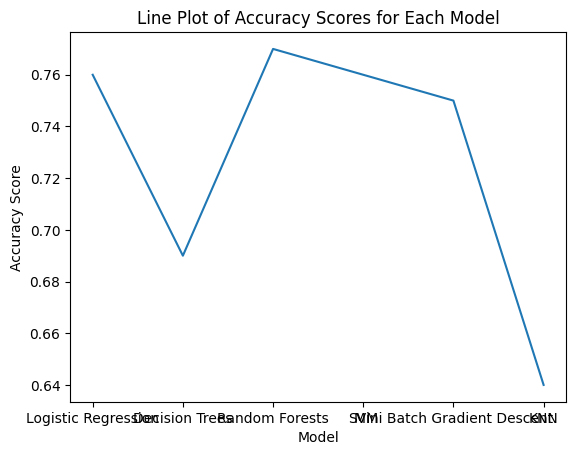

In [ ]:
import matplotlib.pyplot as plt

# assume you have the accuracy scores for each model in a list
accuracy_scores = [0.76, 0.69, 0.77, 0.76, 0.75, 0.64]

# assume you have the names of each model in a list
model_names = ['Logistic Regression', 'Decision Trees', 'Random Forests', 'SVM', 'Mini Batch Gradient Descent', 'KNN']

# create a line plot
plt.plot(model_names, accuracy_scores)
plt.xlabel('Model')
plt.ylabel('Accuracy Score')
plt.title('Line Plot of Accuracy Scores for Each Model')
plt.show()

**COMBINING MODELS FOR BEST MODEL PREDICTION**

In [ ]:
# Combining multiple models into an ensemble VotingClassifier to improve prediction accuracy
ensemble = VotingClassifier(estimators=[(name, model) for name, model in best_models.items()],
                            voting='soft') # 'soft' voting considers the confidence level of predictions

ensemble.fit(X_train, y_train)

VotingClassifier(estimators=[('Gradient Boosting',
                              Pipeline(steps=[('scaler', StandardScaler()),
                                              ('smote', SMOTE(random_state=42)),
                                              ('pca',
                                               PCA(n_components=0.95,
                                                   random_state=42)),
                                              ('model',
                                               GradientBoostingClassifier(learning_rate=0.05,
                                                                          max_depth=2,
                                                                          n_estimators=150,
                                                                          n_iter_no_change=10,
                                                                          random_state=42,
                                                                          subsample=0.5))])),
                             ('Random Forest',
                              Pipeline(steps=[('scal...
                                              ('smote', SMOTE(random_state=42)),
                                              ('pca',
                                               PCA(n_components=0.95,
                                                   random_state=42)),
                                              ('model',
                                               SVC(C=0.8668695797323276,
                                                   kernel='linear',
                                                   probability=True,
                                                   random_state=42))])),
                             ('KNN',
                              Pipeline(steps=[('scaler', StandardScaler()),
                                              ('smote', SMOTE(random_state=42)),
                                              ('pca',
                                               PCA(n_components=0.95,
                                                   random_state=42)),
                                              ('model',
                                               KNeighborsClassifier(n_neighbors=9))]))],
                 voting='soft')

**BEST MODEL**

Ensemble model accuracy: 0.7028


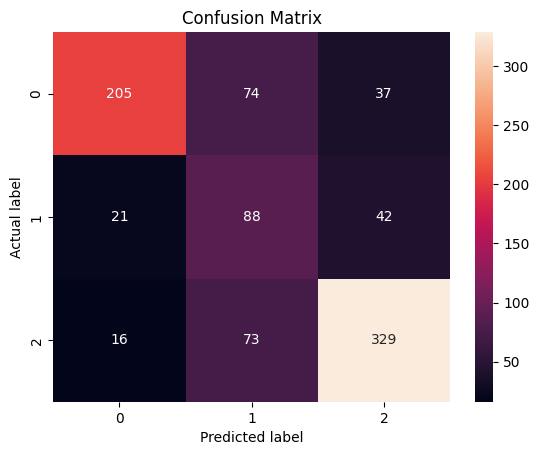

Test Accuracy: 0.7028
Training Accuracy: 0.7570

              precision    recall  f1-score   support

     Dropout       0.85      0.65      0.73       316
    Enrolled       0.37      0.58      0.46       151
    Graduate       0.81      0.79      0.80       418

    accuracy                           0.70       885
   macro avg       0.68      0.67      0.66       885
weighted avg       0.75      0.70      0.72       885



In [ ]:
# Evaluating ensemble model performance on the test set
y_pred = ensemble.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Ensemble model accuracy: {accuracy:.4f}")

# Plotting the Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d")
plt.title('Confusion Matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

# Overfitting Check
train_accuracy = ensemble.score(X_train, y_train)
test_accuracy = ensemble.score(X_test, y_test)

print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Training Accuracy: {train_accuracy:.4f}\n")

# Classification Report
print(classification_report(y_test, y_pred, target_names=['Dropout', 'Enrolled', 'Graduate']))

**DEEP LEARNING MODEL**

**ANN**

In [ ]:
# Create a neural network model
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test loss: {loss:.3f}, Test accuracy: {accuracy:.3f}')

Epoch 1/50
111/111 [==============================] - 4s 9ms/step - loss: -20.6906 - accuracy: 0.1831 - val_loss: -67.8857 - val_accuracy: 0.1706
Epoch 2/50
111/111 [==============================] - 0s 4ms/step - loss: -542.6886 - accuracy: 0.1817 - val_loss: -1135.7762 - val_accuracy: 0.1706
Epoch 3/50
111/111 [==============================] - 0s 3ms/step - loss: -4316.9146 - accuracy: 0.1817 - val_loss: -6632.4165 - val_accuracy: 0.1706
Epoch 4/50
111/111 [==============================] - 0s 3ms/step - loss: -17407.5859 - accuracy: 0.1817 - val_loss: -22110.1055 - val_accuracy: 0.1706
Epoch 5/50
111/111 [==============================] - 0s 2ms/step - loss: -48228.3125 - accuracy: 0.1817 - val_loss: -56265.1914 - val_accuracy: 0.1706
Epoch 6/50
111/111 [==============================] - 0s 2ms/step - loss: -108325.5781 - accuracy: 0.1817 - val_loss: -116303.5625 - val_accuracy: 0.1706
Epoch 7/50
111/111 [==============================] - 0s 3ms/step - loss: -211602.4844 - accuracy

# **HYPER TUNING for increasing models accuracy**

In [ ]:
# Cloning the original DataFrame to preserve the initial dataset
df_reworked = df.copy()

# Transforming 'Student Status' into a binary 'dropout' feature
df_reworked['dropout'] = df_reworked['Target'].map(lambda x: 1 if x == 0 else 0)

# Dropping the original 'Student Status' to avoid confusion
df_reworked.drop(['Target'], axis=1, inplace=True)

# Preparing the dataset for training
X_new = df_reworked.drop('dropout', axis=1)
y_new = df_reworked['dropout']

X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new, y_new, test_size=0.2, random_state=42)

# **MODEL'S EVALUATION AFTER HYPERTUNING**

Starting search for: Gradient Boosting
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Test score for Gradient Boosting: 0.8432
Training Score for Gradient Boosting: 0.8638
Search completed for Gradient Boosting. Time taken: 0:03:06
Best parameters for Gradient Boosting: {'model__learning_rate': 0.047454011884736254, 'model__max_depth': 2, 'model__n_estimators': 114}


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


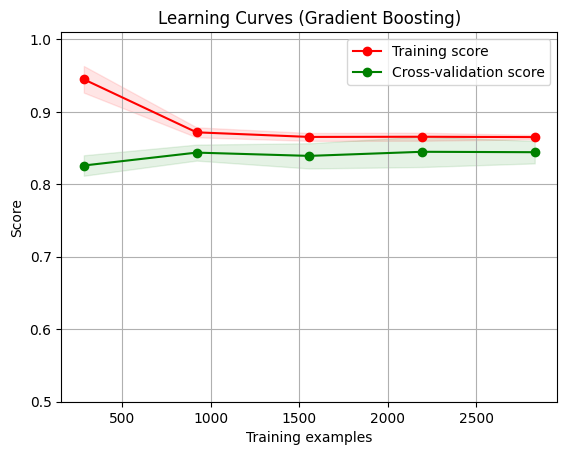

Starting search for: Random Forest
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Test score for Random Forest: 0.8429
Training Score for Random Forest: 0.8669
Search completed for Random Forest. Time taken: 0:01:47
Best parameters for Random Forest: {'model__max_depth': 5, 'model__min_samples_leaf': 3, 'model__min_samples_split': 5, 'model__n_estimators': 186}


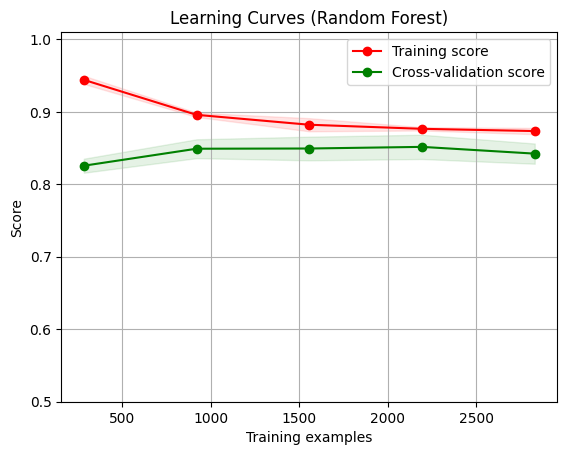

Starting search for: Logistic Regression
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Test score for Logistic Regression: 0.8406
Training Score for Logistic Regression: 0.8446
Search completed for Logistic Regression. Time taken: 0:00:11
Best parameters for Logistic Regression: {'model__C': 0.07058449429580245}


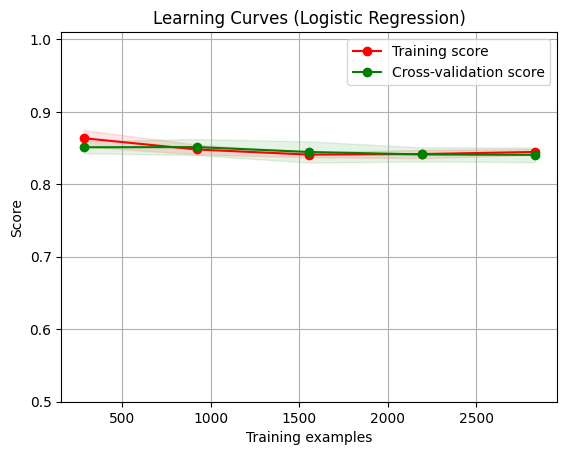

Starting search for: SVM
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Test score for SVM: 0.8446
Training Score for SVM: 0.8805
Search completed for SVM. Time taken: 0:02:47
Best parameters for SVM: {'model__C': 1.749080237694725, 'model__kernel': 'rbf'}


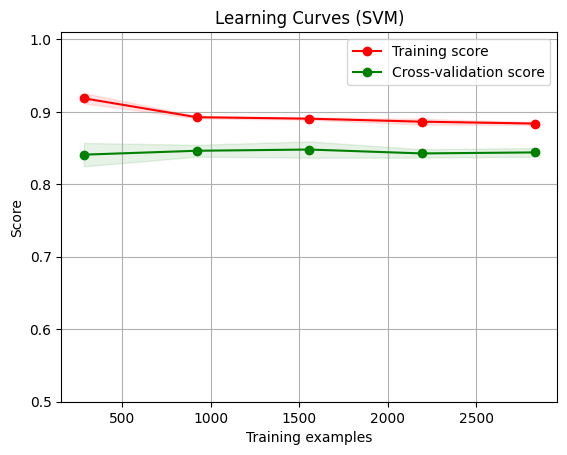

Starting search for: KNN
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Test score for KNN: 0.8268
Training Score for KNN: 0.8550
Search completed for KNN. Time taken: 0:00:10
Best parameters for KNN: {'model__n_neighbors': 24, 'model__weights': 'uniform'}


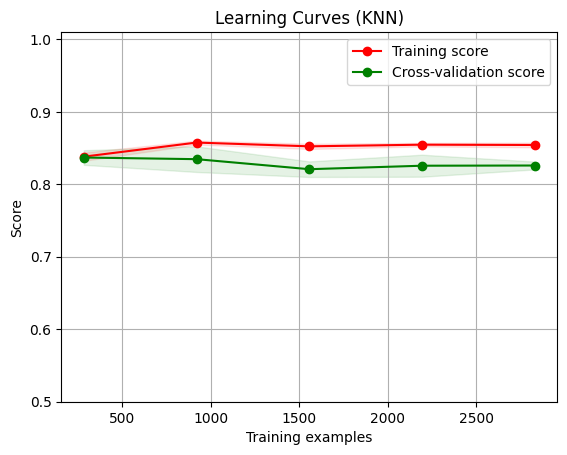

Starting search for: Mini-Batch Gradient Descent
Fitting 5 folds for each of 12 candidates, totalling 60 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
45 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
45 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 405, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py", line 892, in fit
    self._more_validate_params()
  File "/usr/local/lib/

Test score for Mini-Batch Gradient Descent: 0.8652
Training Score for Mini-Batch Gradient Descent: 0.8692
Search completed for Mini-Batch Gradient Descent. Time taken: 0:00:00
Best parameters for Mini-Batch Gradient Descent: {'model__alpha': 0.003954165025399161, 'model__learning_rate': 'optimal', 'model__max_iter': 152, 'model__tol': 0.00240893825622149}


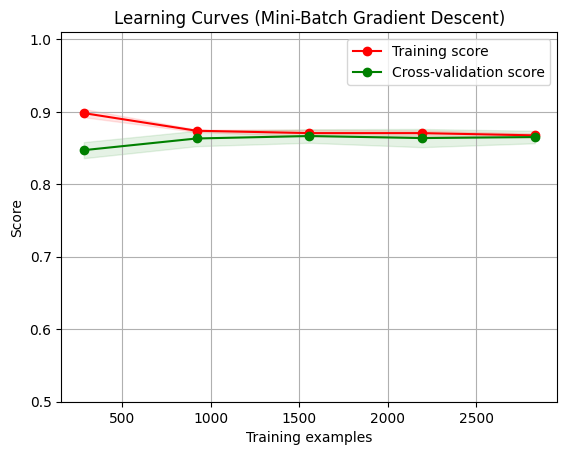

Starting search for: Artificial Neural Network
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Test score for Artificial Neural Network: 0.8728
Training Score for Artificial Neural Network: 0.8782
Search completed for Artificial Neural Network. Time taken: 0:00:39
Best parameters for Artificial Neural Network: {'model__activation': 'tanh', 'model__alpha': 0.001528668179219408, 'model__hidden_layer_sizes': (150,), 'model__max_iter': 249, 'model__solver': 'adam', 'model__tol': 0.009799098521619943}


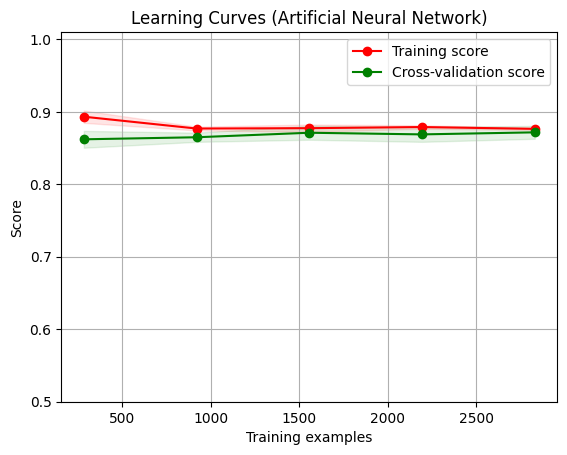

Starting search for: Decision Tree
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Test score for Decision Tree: 0.8613
Training Score for Decision Tree: 0.8830
Search completed for Decision Tree. Time taken: 0:00:00
Best parameters for Decision Tree: {'model__max_depth': 6, 'model__min_samples_leaf': 3, 'model__min_samples_split': 8}


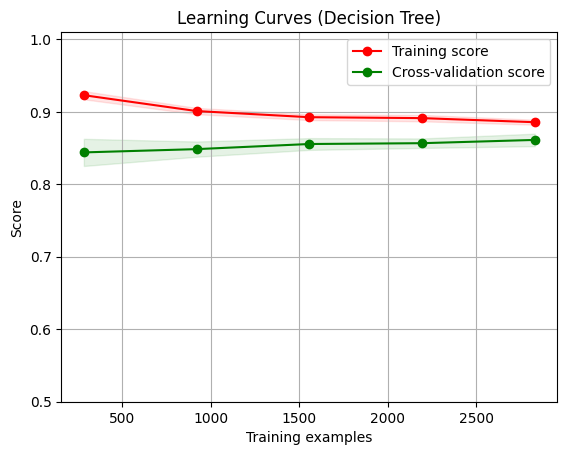

Starting search for: Linear Regression
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Test score for Linear Regression: 0.8762
Training Score for Linear Regression: 0.8776
Search completed for Linear Regression. Time taken: 0:00:02
Best parameters for Linear Regression: {'model__C': 0.7819939418114051}


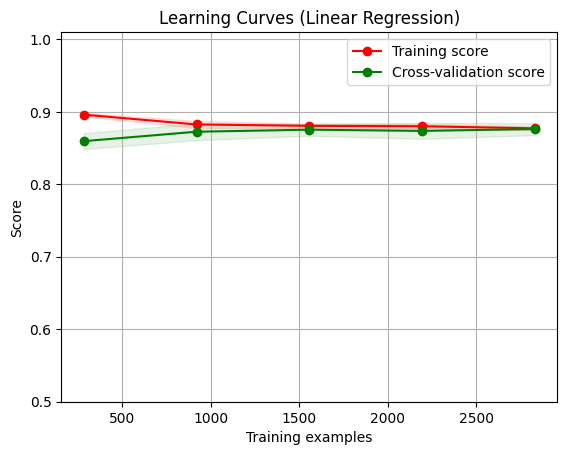

Total time for all model searches: 0:10:31
Test score for Gradient Boosting: 0.8418
              precision    recall  f1-score   support

           0       0.85      0.91      0.88       569
           1       0.81      0.72      0.77       316

    accuracy                           0.84       885
   macro avg       0.83      0.82      0.82       885
weighted avg       0.84      0.84      0.84       885

[[517  52]
 [ 88 228]]
Test score for Random Forest: 0.8395
              precision    recall  f1-score   support

           0       0.85      0.91      0.88       569
           1       0.82      0.71      0.76       316

    accuracy                           0.84       885
   macro avg       0.83      0.81      0.82       885
weighted avg       0.84      0.84      0.84       885

[[518  51]
 [ 91 225]]
Test score for Logistic Regression: 0.8384
              precision    recall  f1-score   support

           0       0.87      0.88      0.87       569
           1       0.78    

In [ ]:
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.decomposition import PCA
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression , SGDClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import randint, uniform
from sklearn.model_selection import learning_curve
from sklearn.neural_network import MLPClassifier

# Model configurations with hyperparameters
models_config_new = {
    'Gradient Boosting': {
        'pipeline': ImbPipeline(steps=[
            ('scaler', StandardScaler()),
            ('smote', SMOTE(random_state=42)),
            ('pca', PCA(n_components=0.95)),
            ('model', GradientBoostingClassifier(random_state=42))
        ]),
        'params': {
            'model__n_estimators': randint(100, 150),
            'model__learning_rate': uniform(0.01, 0.1),
            'model__max_depth': randint(2, 4)
        }
    },
    'Random Forest': {
        'pipeline': ImbPipeline(steps=[
            ('scaler', StandardScaler()),
            ('smote', SMOTE(random_state=42)),
            ('pca', PCA(n_components=0.95)),
            ('model', RandomForestClassifier(random_state=42))
        ]),
        'params': {
            'model__n_estimators': randint(100, 200),
            'model__max_depth': randint(3, 6),
            'model__min_samples_split': randint(3, 6),
            'model__min_samples_leaf': randint(2, 4)
        }
    },
    'Logistic Regression': {
        'pipeline': ImbPipeline(steps=[
            ('scaler', StandardScaler()),
            ('smote', SMOTE(random_state=42)),
            ('pca', PCA(n_components=0.95)),
            ('model', LogisticRegression(random_state=42))
        ]),
        'params': {
            'model__C': uniform(0.05, 1)
        }
    },
    'SVM': {
        'pipeline': ImbPipeline(steps=[('scaler', StandardScaler()),
            ('smote', SMOTE(random_state=42)),
            ('pca', PCA(n_components=0.95)),
            ('model', SVC(probability=True, random_state=42))
        ]),
        'params': {
            'model__C': uniform(1, 2),
            'model__kernel': ['rbf']
        }
    },
    'KNN': {
        'pipeline': ImbPipeline(steps=[
            ('scaler', StandardScaler()),
            ('smote', SMOTE(random_state=42)),
            ('pca', PCA(n_components=0.95)),
            ('model', KNeighborsClassifier())
        ]),
        'params': {
            'model__n_neighbors': randint(20, 30),
            'model__weights': ['uniform', 'distance']
        }
    },
    'Mini-Batch Gradient Descent': {
        'pipeline': Pipeline(steps=[
            ('scaler', StandardScaler()),
            ('model', SGDClassifier(random_state=42))
        ]),
        'params': {
            'model__alpha': uniform(0.0001, 0.01),
            'model__learning_rate': ['constant', 'optimal', 'invscaling'],
            'model__max_iter': randint(100, 500),
            'model__tol': uniform(0.0001, 0.01)
        }
    },
    'Artificial Neural Network': {
        'pipeline': Pipeline(steps=[
            ('scaler', StandardScaler()),
            ('model', MLPClassifier(random_state=42))
        ]),
        'params': {
            'model__hidden_layer_sizes': [(50,), (100,), (150,)],
            'model__activation': ['relu', 'tanh'],
            'model__solver': ['adam', 'lbfgs'],
            'model__alpha': uniform(0.0001, 0.01),
            'model__max_iter': randint(100, 500),
            'model__tol': uniform(0.0001, 0.01)
        }
    },
    'Decision Tree': {
        'pipeline': Pipeline(steps=[
            ('model', DecisionTreeClassifier(random_state=42))
        ]),
        'params': {
            'model__max_depth': randint(3, 10),
            'model__min_samples_split': randint(3, 10),
            'model__min_samples_leaf': randint(2, 5)
        }
    },
    'Linear Regression': {
        'pipeline': Pipeline(steps=[
            ('scaler', StandardScaler()),
            ('model', LogisticRegression(random_state=42))
        ]),
        'params': {
            'model__C': uniform(0.05, 1)
        }
    }
}

best_models_binary = {}
start_time_new = time.time()

# New RandomizedSearchCV
for name, config in models_config_new.items():
    print(f"Starting search for: {name}")
    search_start_time_new = time.time()

    search = RandomizedSearchCV(config['pipeline'], config['params'], n_iter=12, cv=5, scoring='accuracy', random_state=42, verbose=1)
    search.fit(X_train_new, y_train_new)

    best_models_binary[name] = search.best_estimator_
    print(f"Test score for {name}: {search.best_score_:.4f}")

    # Comparing training set performance to the best CV score
    training_score = search.score(X_train_new, y_train_new)
    print(f"Training Score for {name}: {training_score:.4f}")

    elapsed_time_new = int(time.time() - search_start_time_new)
    print(f"Search completed for {name}. Time taken: {str(timedelta(seconds=elapsed_time_new))}")

    # Displaying the best parameters for the current model
    print(f"Best parameters for {name}: {search.best_params_}")

    # Plotting the learning curve for the best estimator
    plot_learning_curve(search.best_estimator_, f"Learning Curves ({name})", X_train_new, y_train_new, ylim=(0.5, 1.01), cv=5, n_jobs=4)

overall_time_new = int(time.time() - start_time_new)
print(f"Total time for all model searches: {str(timedelta(seconds=overall_time_new))}")

# Evaluating the best models on the test set
for name, model in best_models_binary.items():
    y_pred = model.predict(X_test_new)
    print(f"Test score for {name}: {accuracy_score(y_test_new, y_pred):.4f}")
    print(classification_report(y_test_new, y_pred))
    print(confusion_matrix(y_test_new, y_pred))

**COMBINING MODELS FOR BEST MODEL PREDICTION**

In [ ]:
# Creating an ensemble of the best models
ensemble_binary = VotingClassifier(
    estimators=[(name, model) for name, model in best_models_binary.items()],
    voting='soft'
)
ensemble_binary.fit(X_train_new, y_train_new)

VotingClassifier(estimators=[('Gradient Boosting',
                              Pipeline(steps=[('scaler', StandardScaler()),
                                              ('smote', SMOTE(random_state=42)),
                                              ('pca', PCA(n_components=0.95)),
                                              ('model',
                                               GradientBoostingClassifier(learning_rate=0.047454011884736254,
                                                                          max_depth=2,
                                                                          n_estimators=114,
                                                                          random_state=42))])),
                             ('Random Forest',
                              Pipeline(steps=[('scaler', StandardScaler()),
                                              ('smote', SMO...
                                                             hidden_layer_sizes=(150,),
                                                             max_iter=249,
                                                             random_state=42,
                                                             tol=0.009799098521619943))])),
                             ('Decision Tree',
                              Pipeline(steps=[('model',
                                               DecisionTreeClassifier(max_depth=6,
                                                                      min_samples_leaf=3,
                                                                      min_samples_split=8,
                                                                      random_state=42))])),
                             ('Linear Regression',
                              Pipeline(steps=[('scaler', StandardScaler()),
                                              ('model',
                                               LogisticRegression(C=0.7819939418114051,
                                                                  random_state=42))]))],
                 voting='soft')

**BEST MODEL**

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1105, number of negative: 2434
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001000 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 799
[LightGBM] [Info] Number of data points in the train set: 3539, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.312235 -> initscore=-0.789691
[LightGBM] [Info] Start training from score -0.789691
Ensemble Model Accuracy: 0.8554


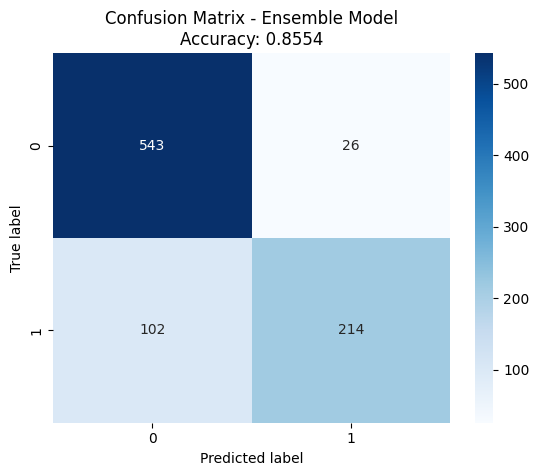

              precision    recall  f1-score   support

     Dropout       0.84      0.95      0.89       569
  No Dropout       0.89      0.68      0.77       316

    accuracy                           0.86       885
   macro avg       0.87      0.82      0.83       885
weighted avg       0.86      0.86      0.85       885



In [ ]:
lgb_binary = lgb.LGBMClassifier(random_state=42)
lgb_binary.fit(X_train_new, y_train_new)

# XGBoost Model
xgb_binary = xgb.XGBClassifier(random_state=42)
xgb_binary.fit(X_train_new, y_train_new)

# Random Forest Model
rf_binary = RandomForestClassifier(random_state=42)
rf_binary.fit(X_train_new, y_train_new)

# SVM Model
svm_binary = SVC(probability=True, random_state=42)
svm_binary.fit(X_train_new, y_train_new)

# MLP Model
mlp_binary = MLPClassifier(random_state=42)
mlp_binary.fit(X_train_new, y_train_new)

# Ensemble Model
ensemble_binary = VotingClassifier(estimators=[
    ('lgb', lgb_binary),
    ('xgb', xgb_binary),
    ('rf', rf_binary),
    ('svm', svm_binary),
    ('mlp', mlp_binary),
    ('sgd', SGDClassifier(loss='log', random_state=42))
], voting='soft', n_jobs=-1)

ensemble_binary.fit(X_train_new, y_train_new)

# Predicting on the test set
y_pred_binary = ensemble_binary.predict(X_test_new)

# Accuracy
accuracy_binary = accuracy_score(y_test_new, y_pred_binary)
print(f"Ensemble Model Accuracy: {accuracy_binary:.4f}")

# Confusion Matrix
conf_matrix_ensemble_binary = confusion_matrix(y_test_new, y_pred_binary)
sns.heatmap(conf_matrix_ensemble_binary, annot=True, fmt="d", cmap='Blues')
plt.title(f"Confusion Matrix - Ensemble Model\nAccuracy: {accuracy_binary:.4f}")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()

# Classification Report
print(classification_report(y_test_new, y_pred_binary, target_names=['Dropout', 'No Dropout']))

# **VISUALISATION**

**PIE CHART FOR TARGET COLUMN**

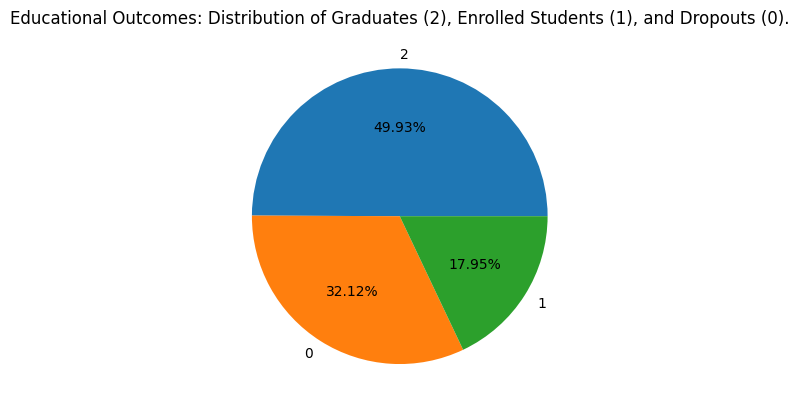

In [ ]:
categories_counts = df['Target'].value_counts()
plt.pie(categories_counts.values, labels=categories_counts.index, autopct='%1.2f%%')

plt.title('Educational Outcomes: Distribution of Graduates (2), Enrolled Students (1), and Dropouts (0).')
plt.show()

**HEAT MAP**

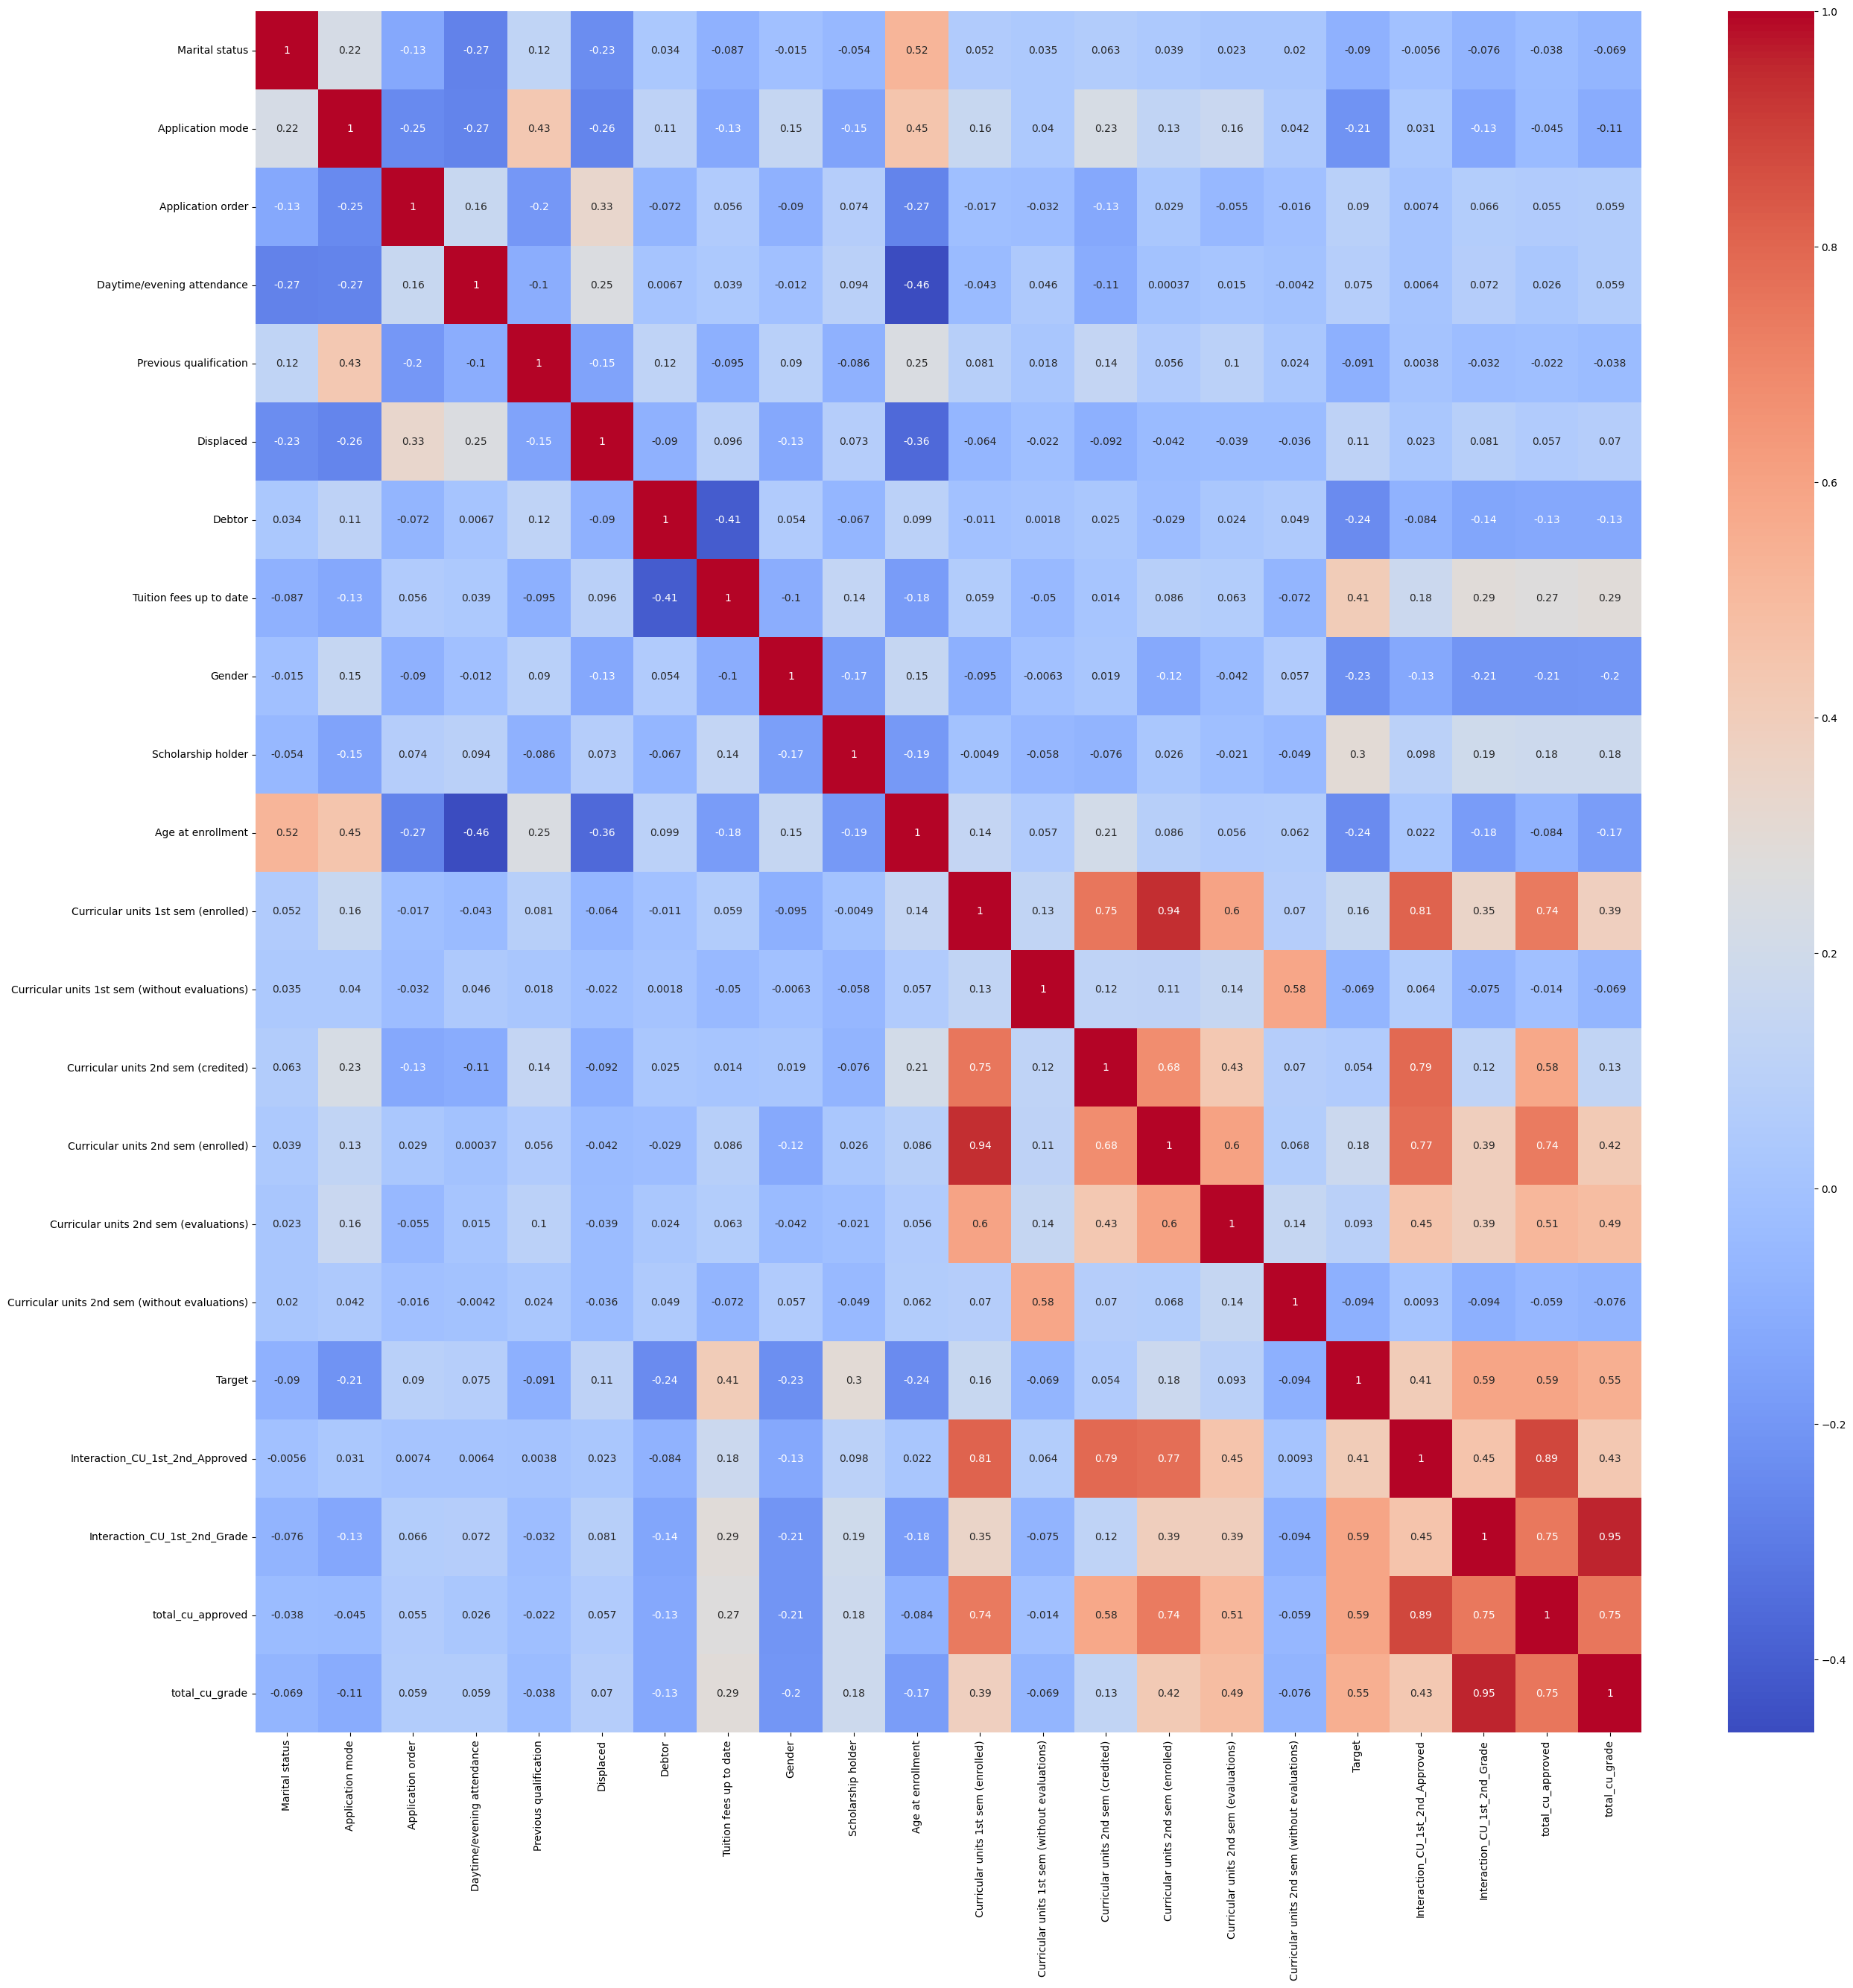

In [ ]:
plt.figure(figsize=(30,30))
ax = sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

**CORRELATION WITH TARGET COLUMN**

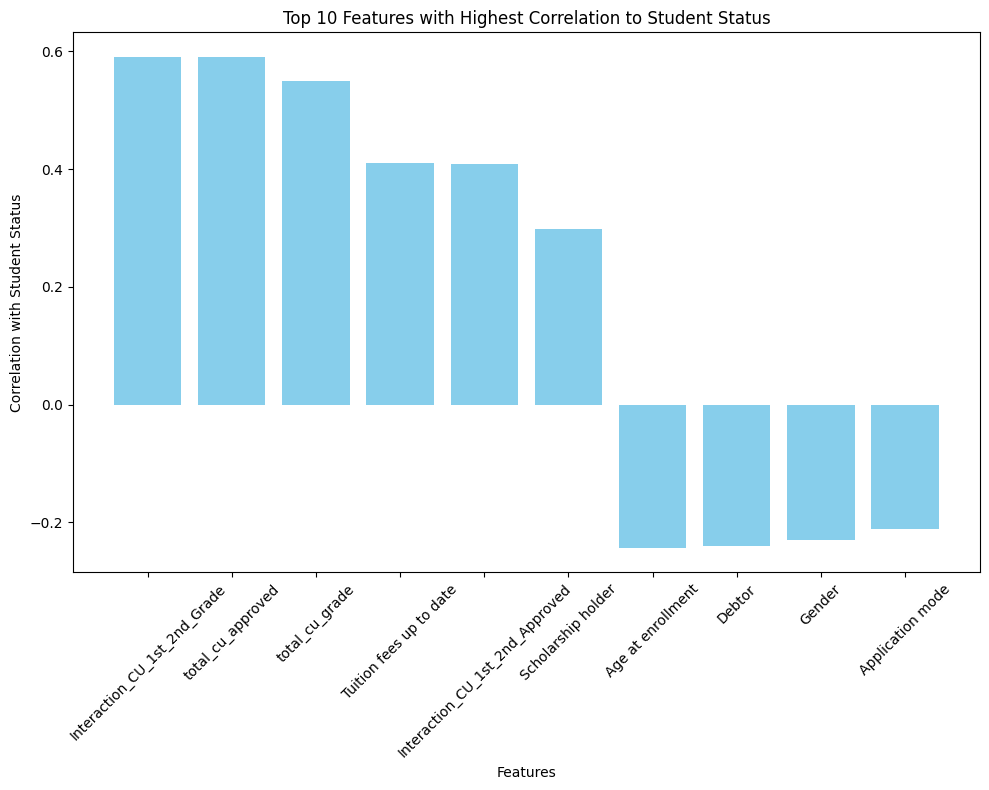

In [ ]:
# Recalculating correlations to ensure consistency
correlations = df.corr()['Target'].drop('Target')
top_10_features = correlations.abs().nlargest(10).index
top_10_corr_values = correlations[top_10_features].values

# Plotting the top 10 features
plt.figure(figsize=(10, 8))
plt.bar(x=top_10_features, height=top_10_corr_values, color='skyblue')
plt.xlabel('Features')
plt.ylabel('Correlation with Student Status')
plt.title('Top 10 Features with Highest Correlation to Student Status')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**FACTOR RANKER**

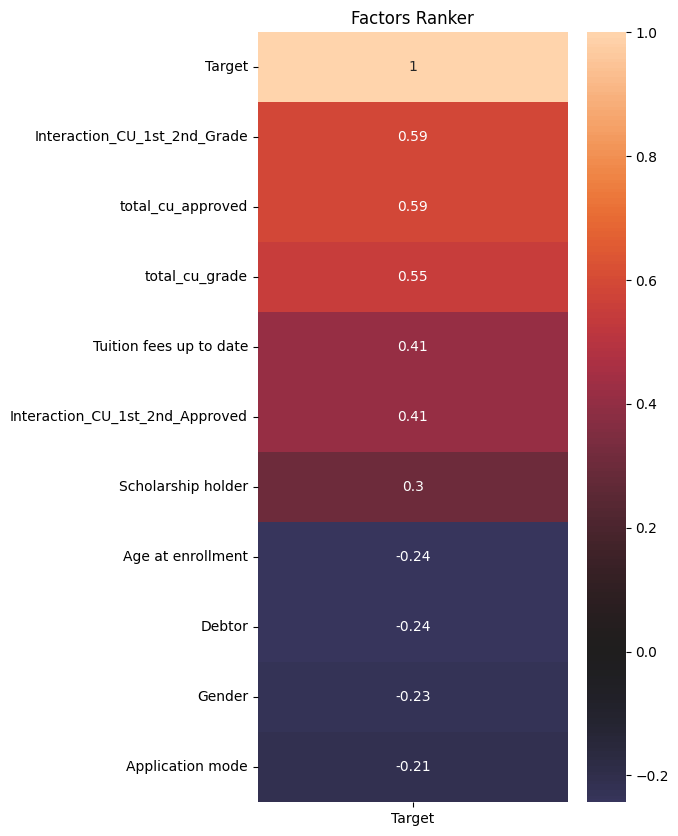

In [ ]:
# Creating a new DataFrame with only the top 10 features and 'Student Status'
top_10_df = df[top_10_features.to_list() + ['Target']].copy()

# Computing the correlation matrix for these features
top_10_corr = top_10_df.corr()[['Target']]

# Sorting by absolute value while keeping the sign to place negative values below positives
sorted_corr = top_10_corr.sort_values(by='Target', key=lambda x: abs(x), ascending=False)

# Plotting the heatmap with custom sorting
plt.figure(figsize=(5, 10))
sns.heatmap(sorted_corr, annot=True, center=0)
plt.title('Factors Ranker')
plt.show()

**Impact of Interaction Between 1st and 2nd Semester Grades on Student Status**

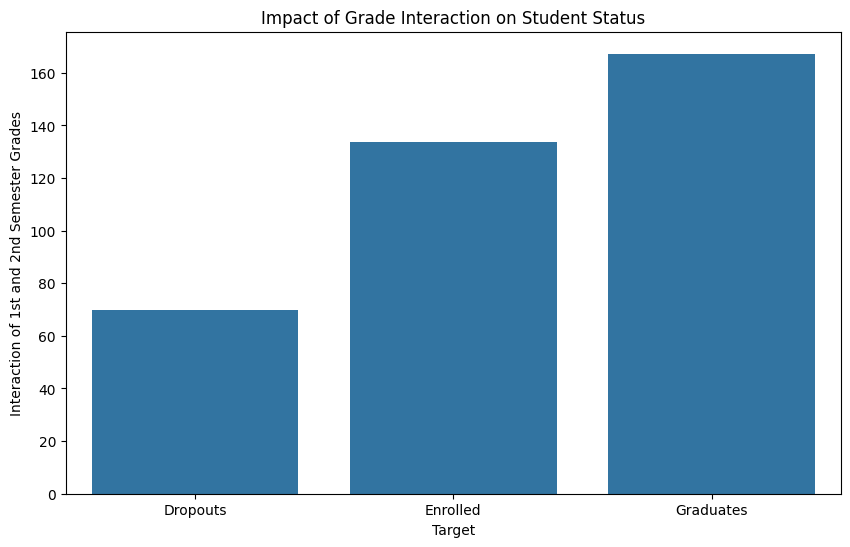

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Target', y='Interaction_CU_1st_2nd_Grade', data=df, errorbar=None)
plt.xticks([0, 1, 2], ['Dropouts', 'Enrolled', 'Graduates'])
plt.xlabel('Target')
plt.ylabel('Interaction of 1st and 2nd Semester Grades')
plt.title('Impact of Grade Interaction on Student Status')
plt.show()

**Financial Obligations**

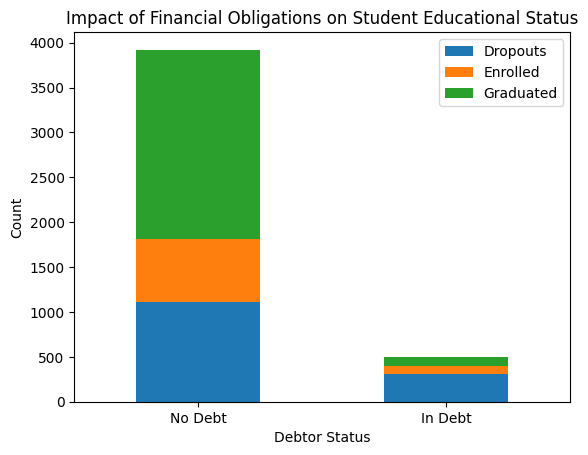

In [ ]:
# Mapping Target numerical labels to descriptive labels for the legend
student_status_labels = {0: 'Dropouts', 1: 'Enrolled', 2: 'Graduated'}

# Mapping numerical labels to descriptive labels for Debtor status
debtor_status_labels = {0: 'No Debt', 1: 'In Debt'}

# Visualizing the impact of student debt on educational status
grouped = df.groupby(['Debtor', 'Target']).size().unstack()
grouped.rename(index=debtor_status_labels, inplace=True)
grouped_plot = grouped.plot(kind='bar', stacked=True)

plt.xlabel('Debtor Status')
plt.ylabel('Count')
plt.title('Impact of Financial Obligations on Student Educational Status')
plt.legend(labels=[student_status_labels.get(item, item) for item in grouped.columns])
plt.xticks(rotation=0)
plt.show()

**AGE of students**

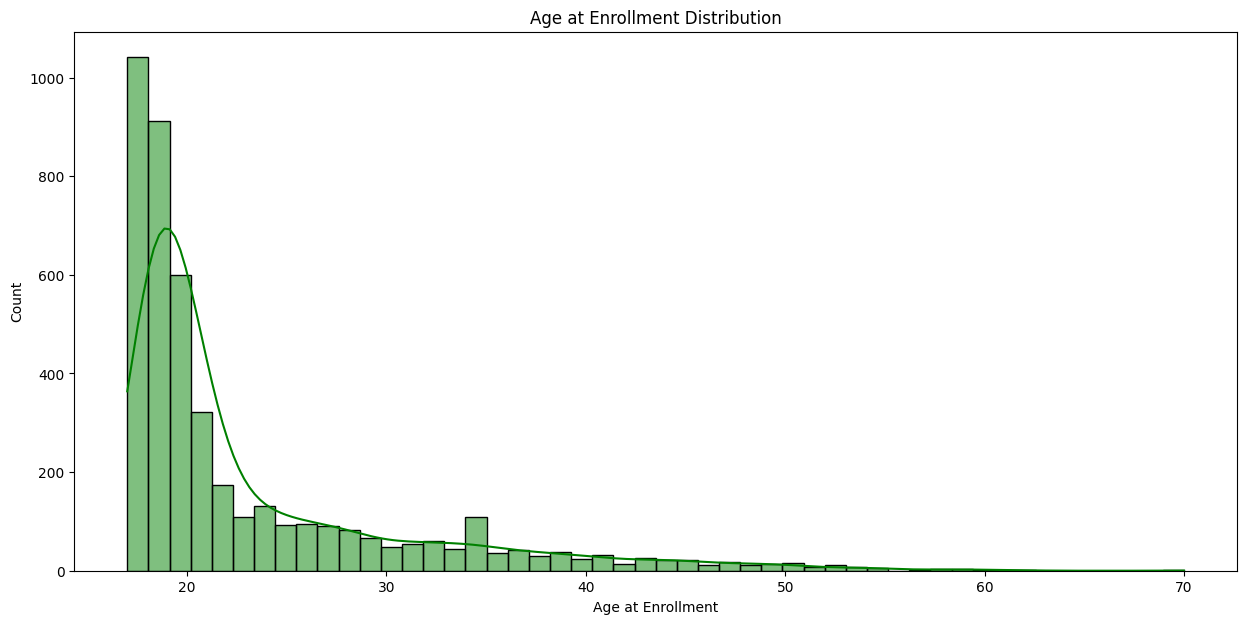

In [ ]:
# Converting inf to NaN in the 'Age at enrollment' column
df['Age at enrollment'] = df['Age at enrollment'].replace([np.inf, -np.inf], np.nan)

# Ignoring FutureWarnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

plt.figure(figsize=(15, 7))
ax = sns.histplot(df['Age at enrollment'], bins=50, color='g', kde=True)
ax.set_title('Age at Enrollment Distribution')
ax.set_xlabel('Age at Enrollment')
ax.set_ylabel('Count')
plt.show()

**SCATTER PLOTS**

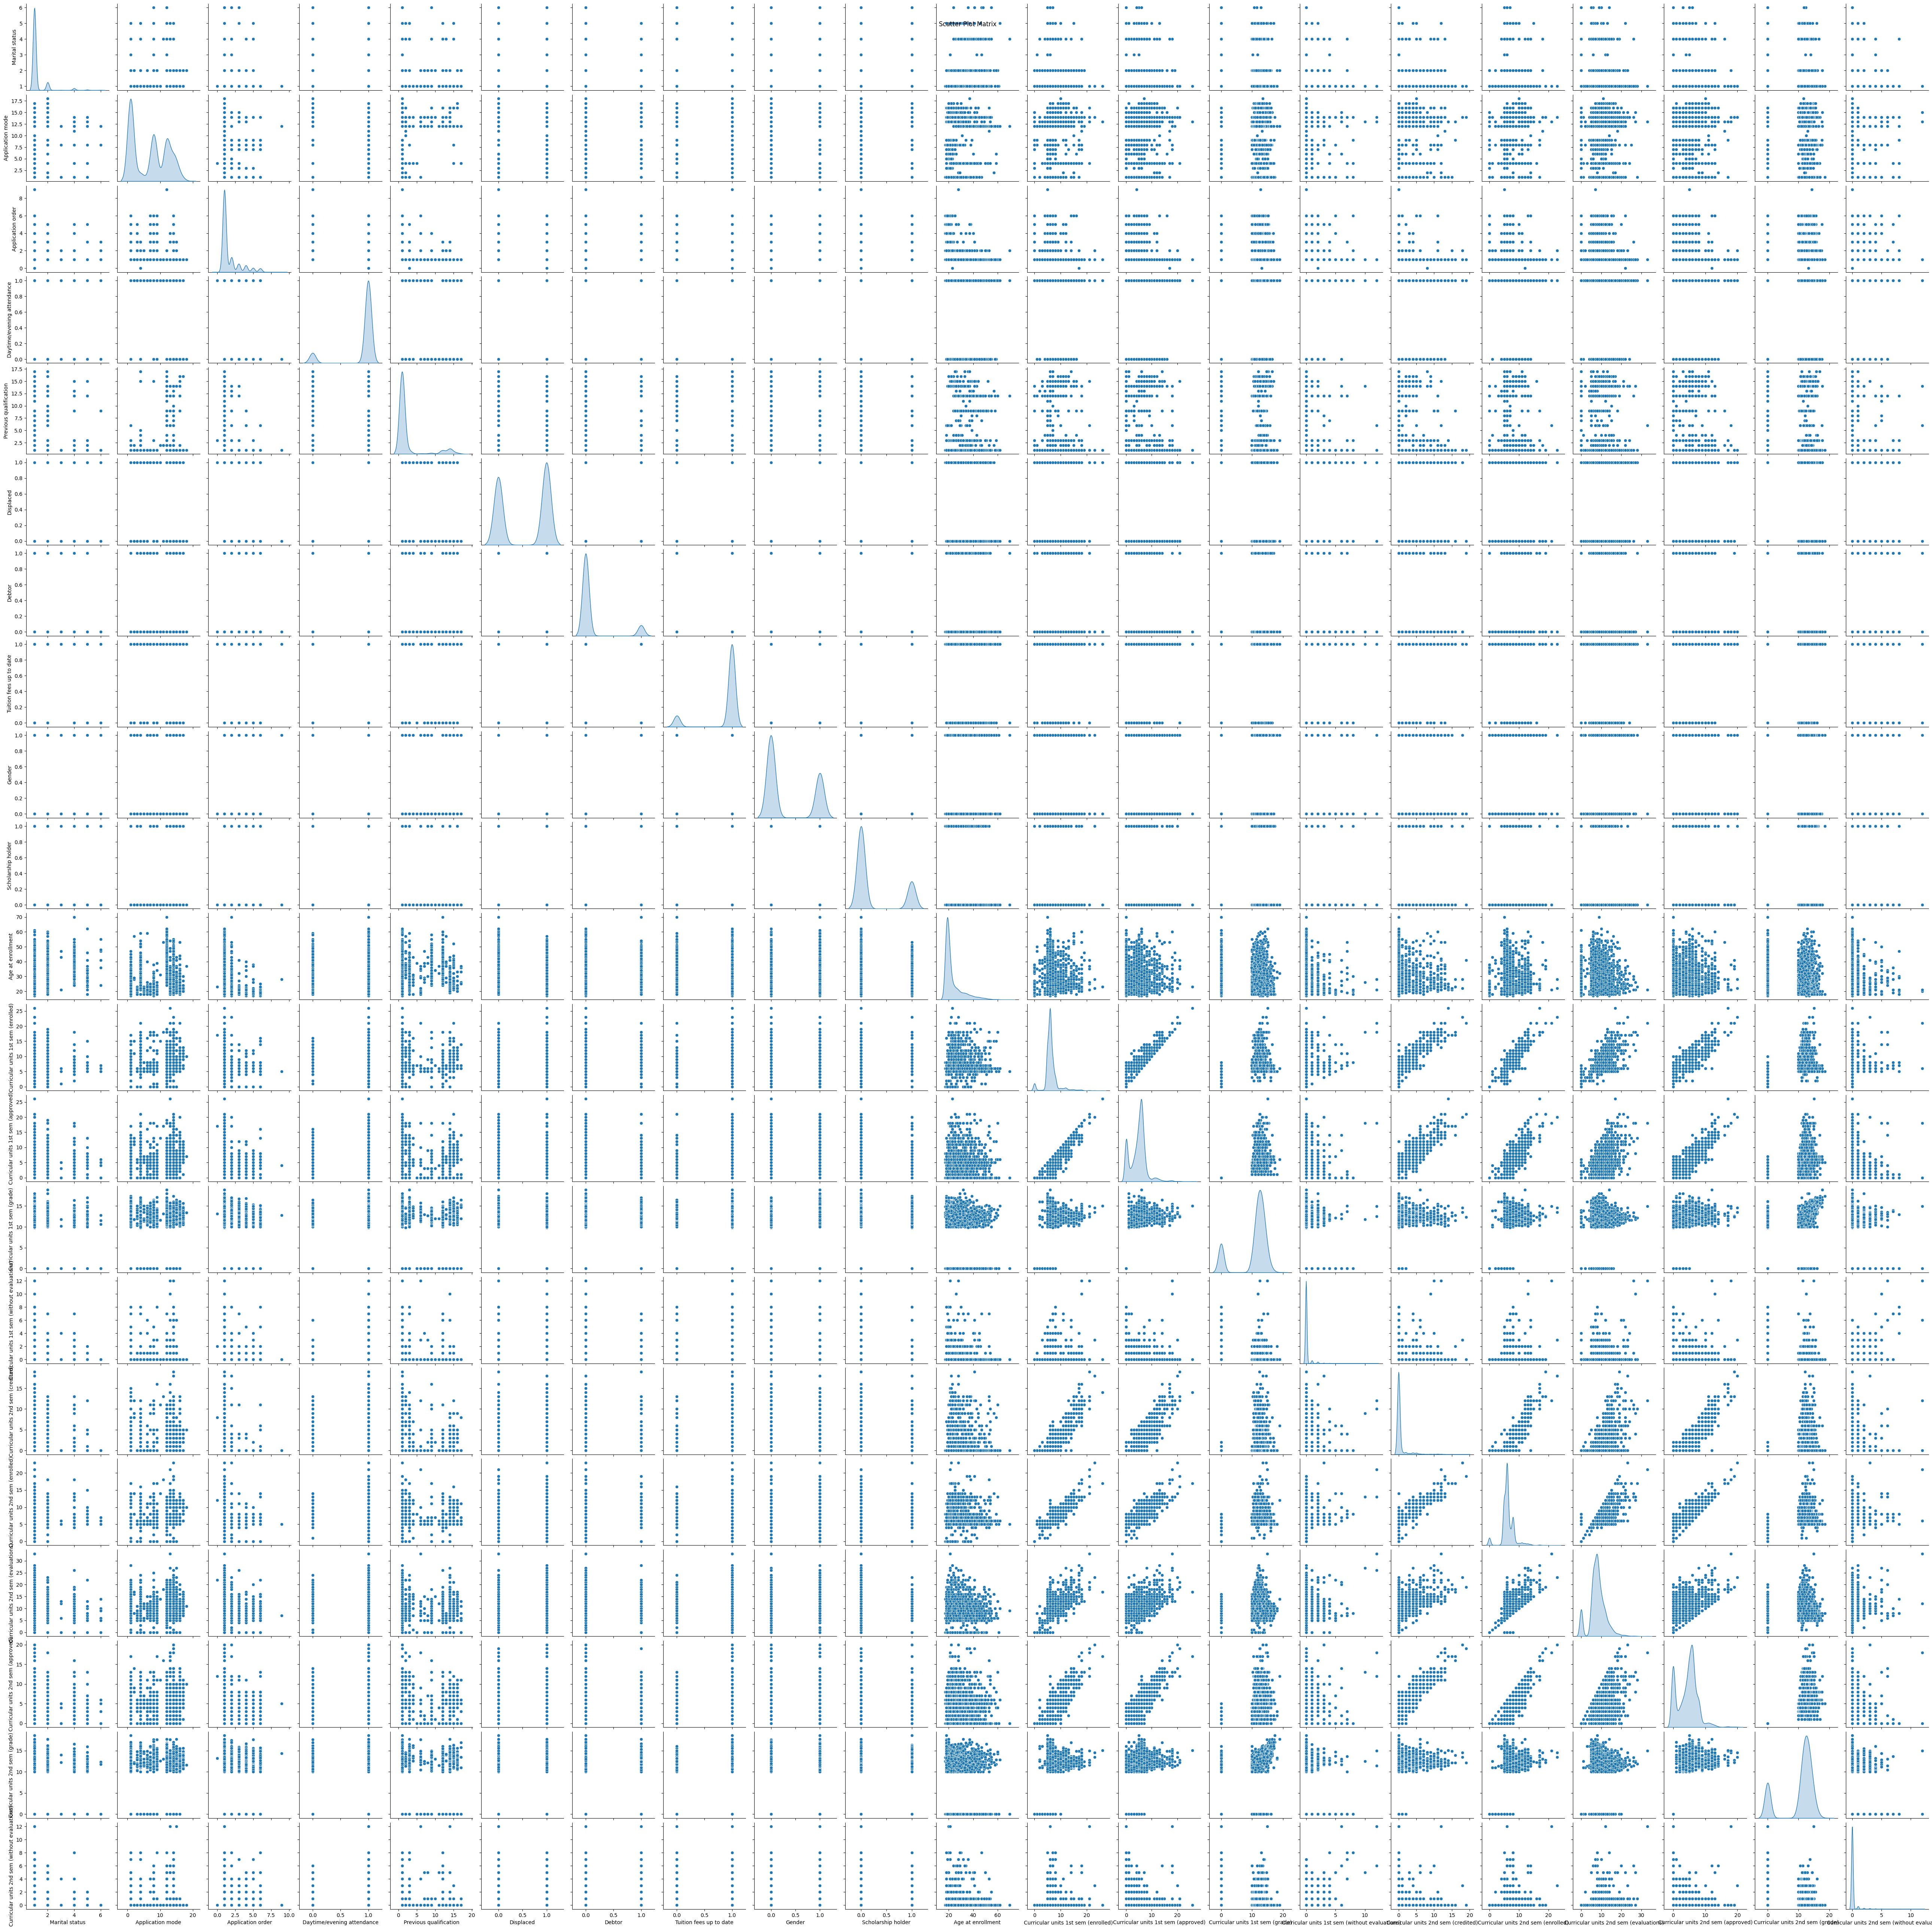

In [20]:
# Extract the target column
target = df["Target"]

# Create a scatter plot matrix for the non-target columns
sns.pairplot(df.drop("Target", axis=1), diag_kind="kde")
plt.suptitle("Scatter Plot Matrix")
plt.show()

**BOX PLOTS**

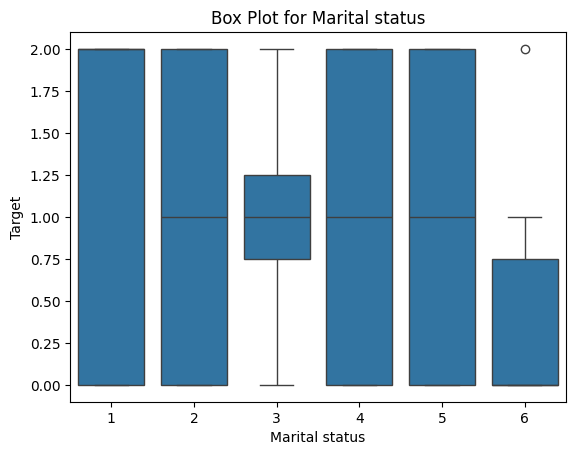

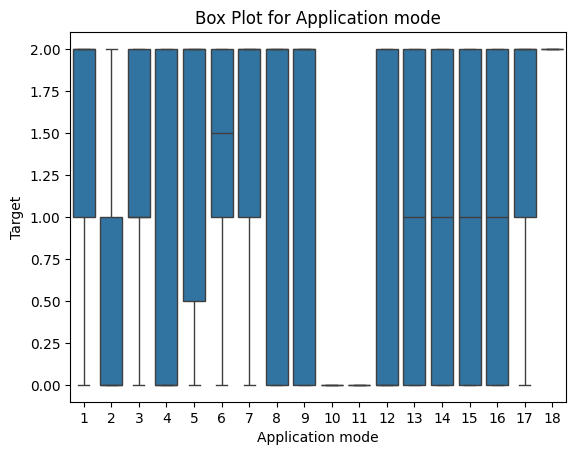

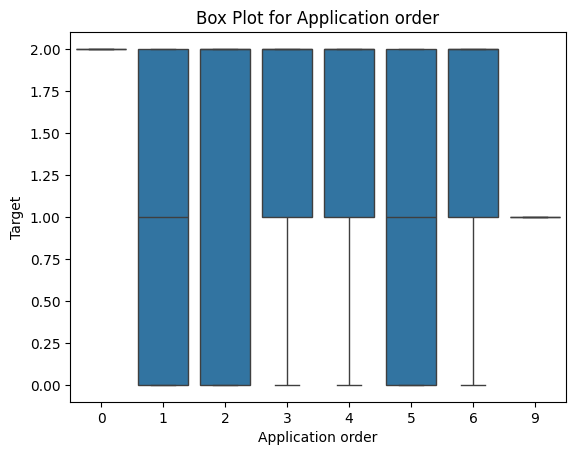

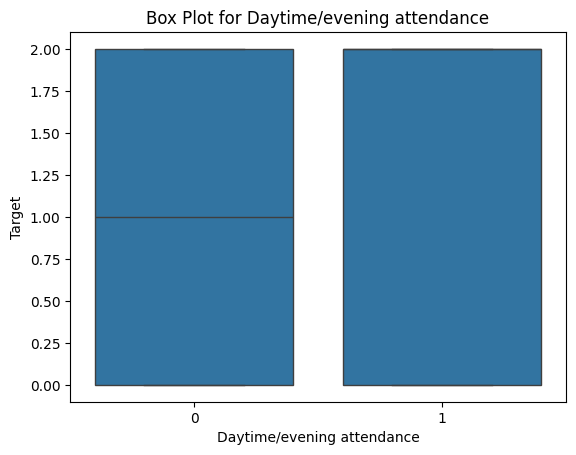

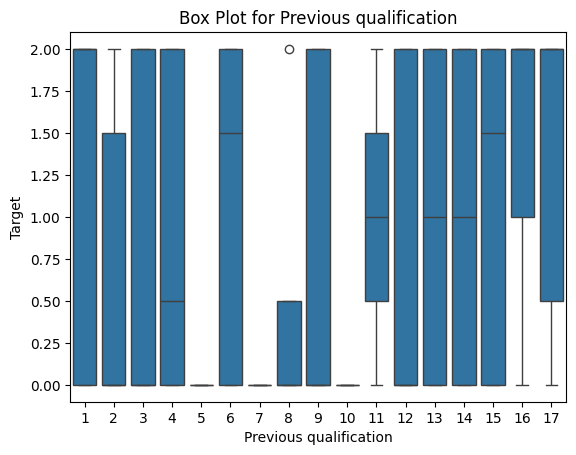

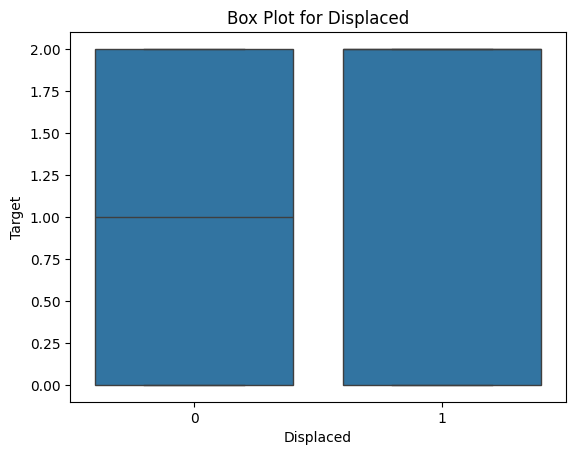

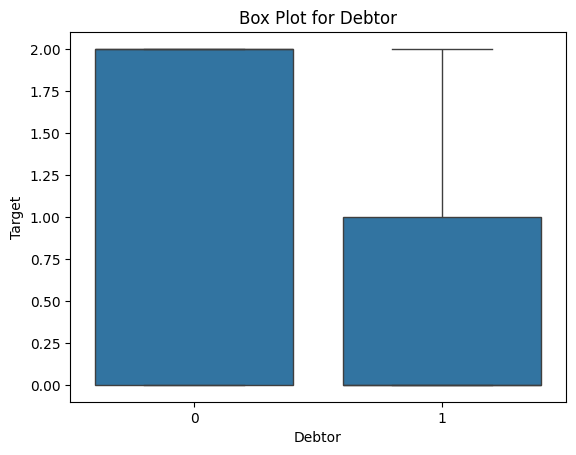

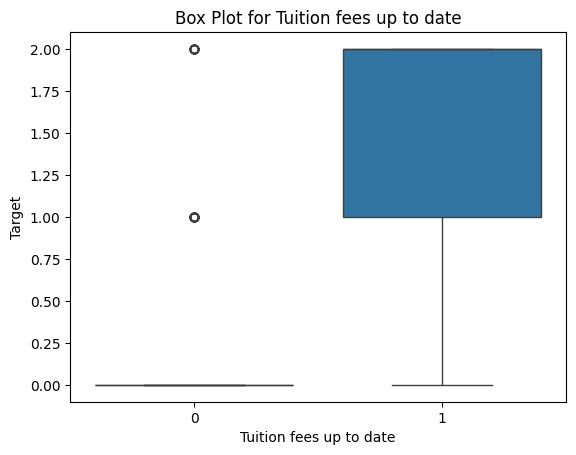

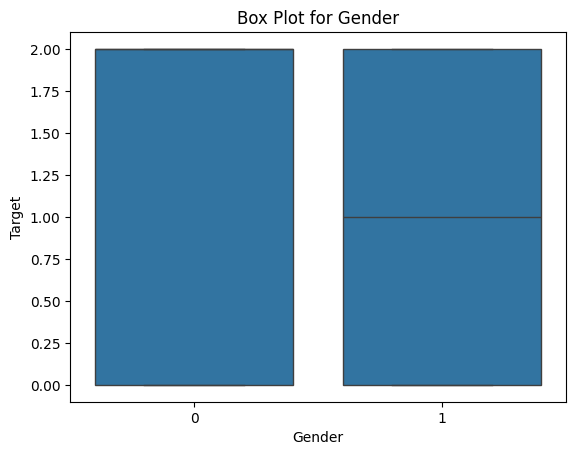

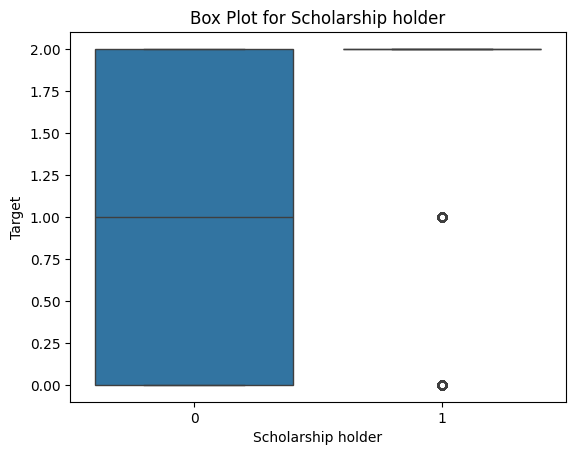

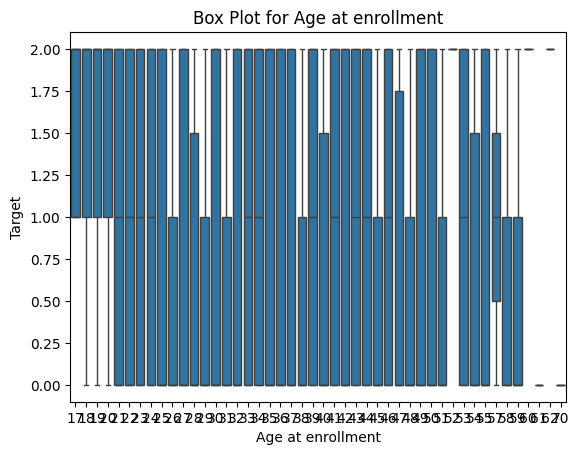

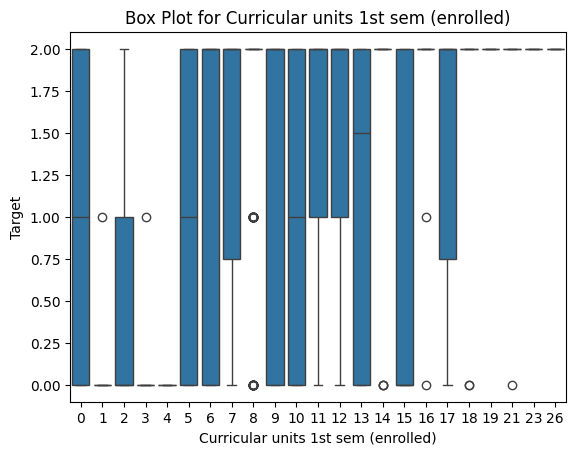

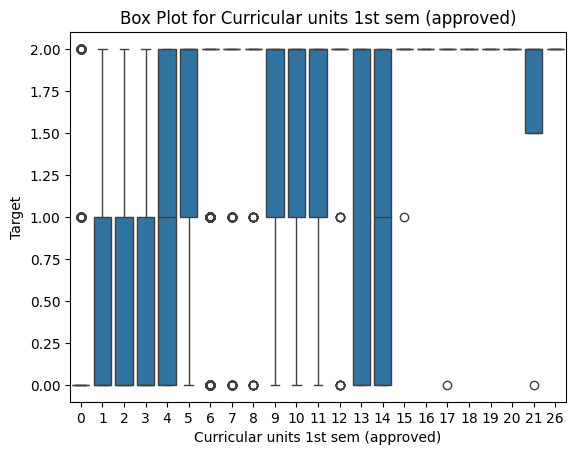

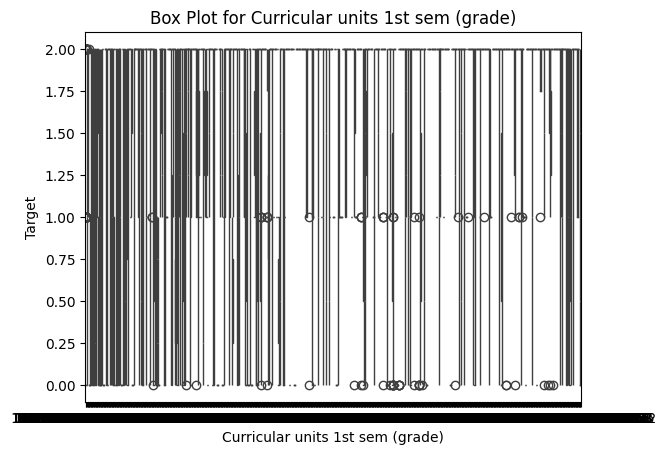

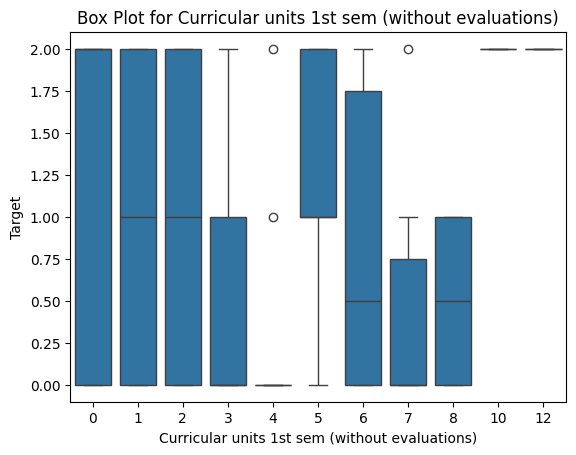

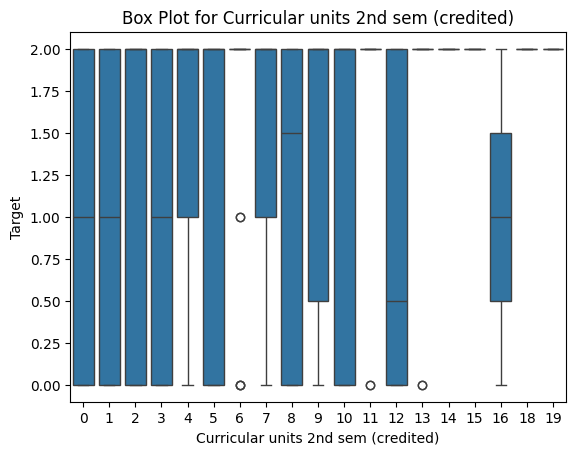

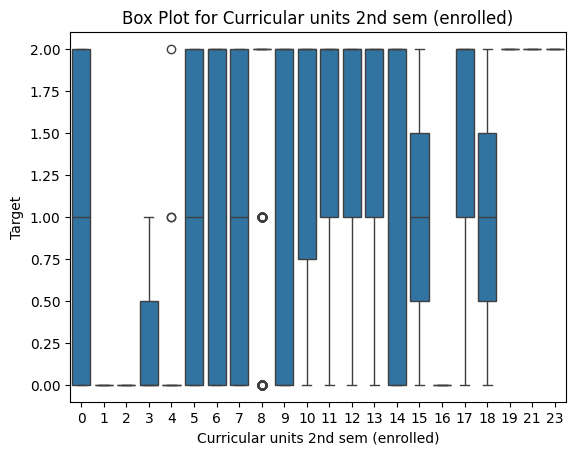

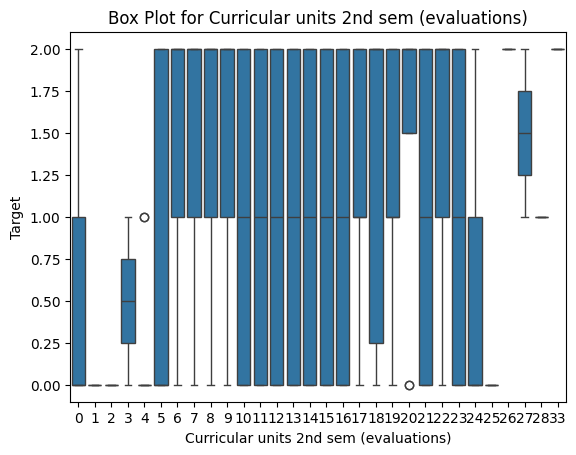

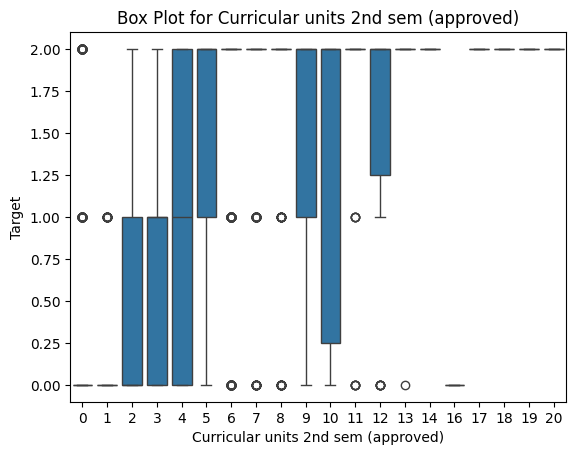

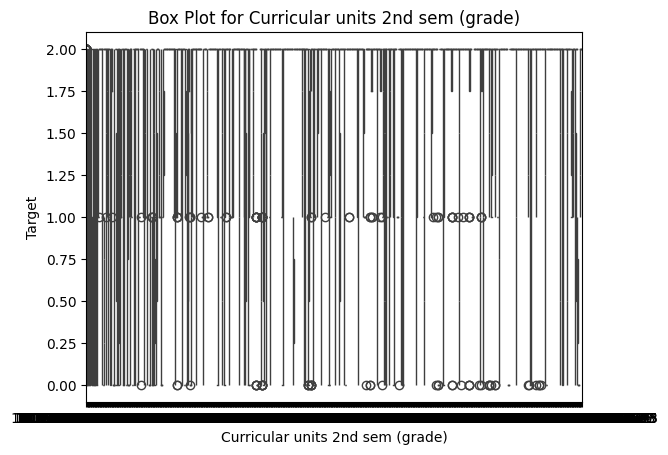

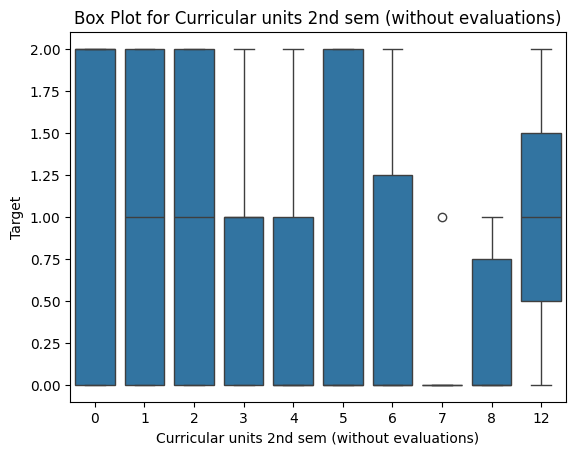

In [24]:
# Create a box plot for each non-target column
for column in df.drop("Target", axis=1):
    sns.boxplot(x=df[column], y=target)
    plt.title(f"Box Plot for {column}")
    plt.show()

**LINE PLOT**

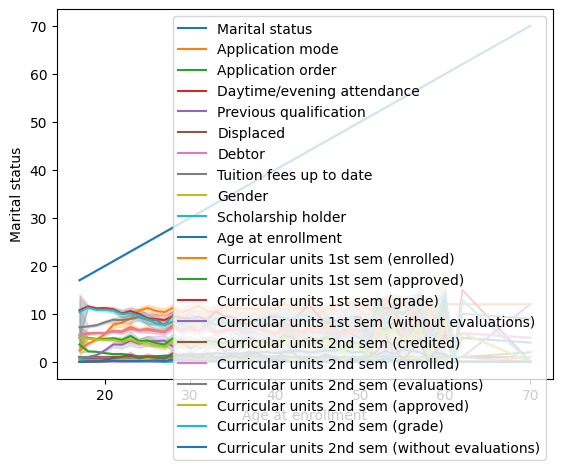

In [29]:
# Create a line plot with the target column and other columns in the dataset
for column in df.drop("Target", axis=1):
    sns.lineplot(x=df["Age at enrollment"], y=df[column], label=column)

# Add a legend
plt.legend()

# Show the plot
plt.show()

**PAIR PLOT**

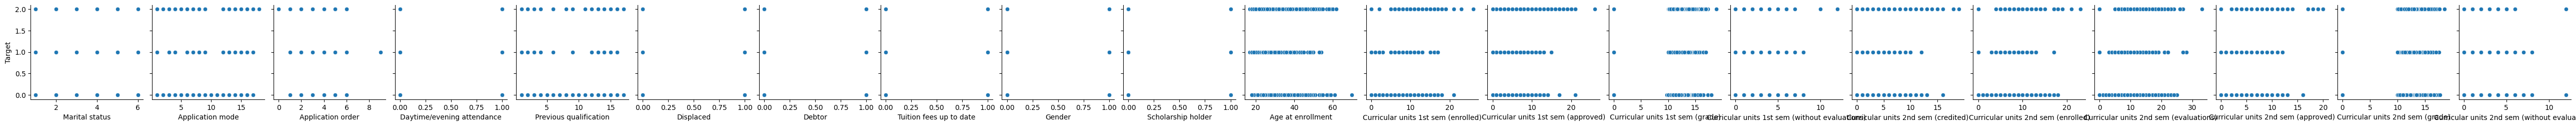

In [28]:
# Create a pair plot with the target column
sns.pairplot(df, x_vars=df.drop("Target", axis=1), y_vars="Target", height=2.5)

# Show the plot
plt.show()

**BUBBLE CHART**

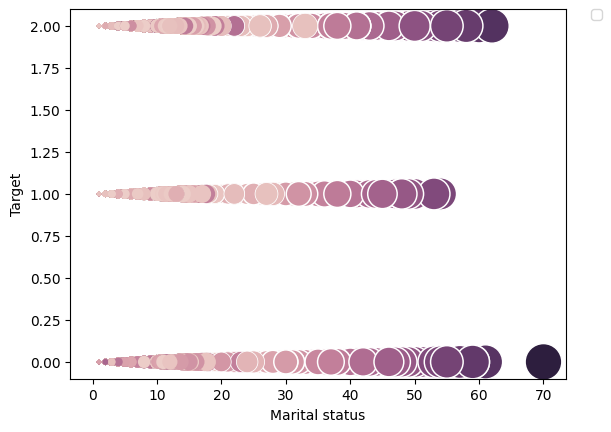

In [32]:
# Create a bubble chart with the target column and other columns in the dataset
for column in df.drop("Target", axis=1):
    sns.scatterplot(x=df[column], y=target, hue=df["Age at enrollment"], legend=False, s=df[column]*10)

# Add a legend
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# Show the plot
plt.show()

**AREA GRAPH**

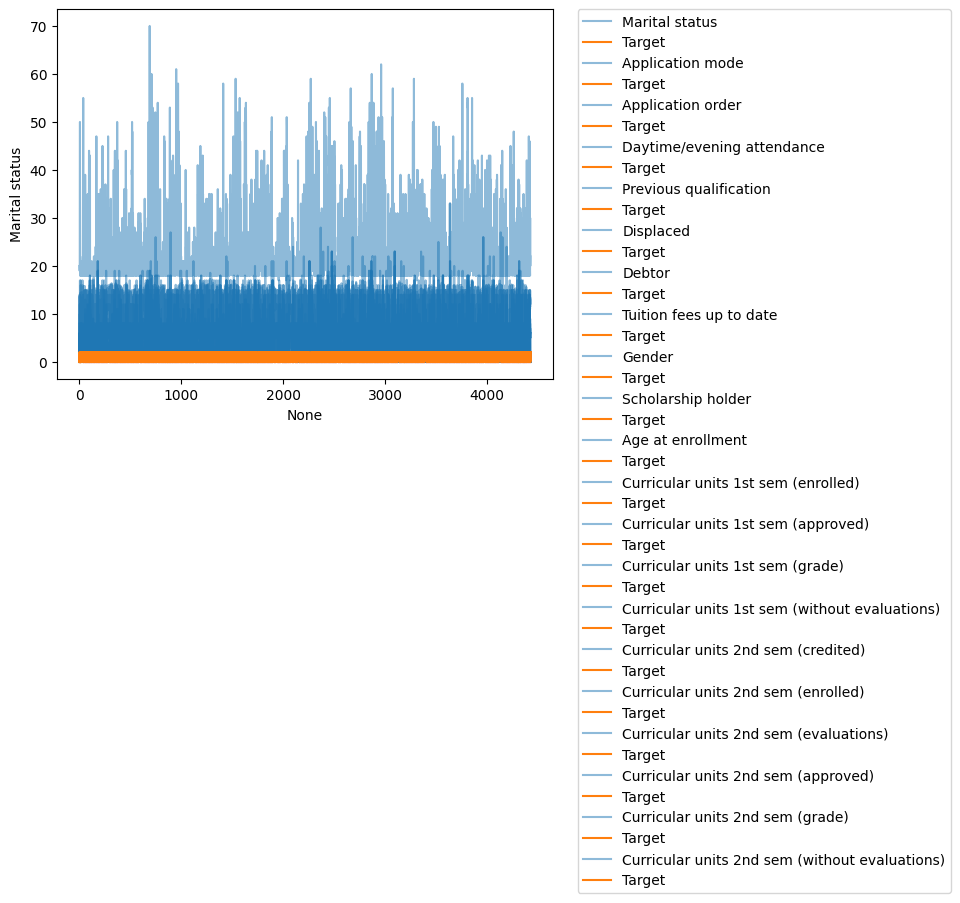

In [33]:
# Create an area graph with the target column and other columns in the dataset
for column in df.drop("Target", axis=1):
    sns.lineplot(x=df.index, y=df[column], label=column, alpha=0.5, color=sns.color_palette()[0])
    sns.lineplot(x=df.index, y=target, label="Target", alpha=1.0, color=sns.color_palette()[1])

# Add a legend
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# Show the plot
plt.show()

**CONTOUR PLOT**

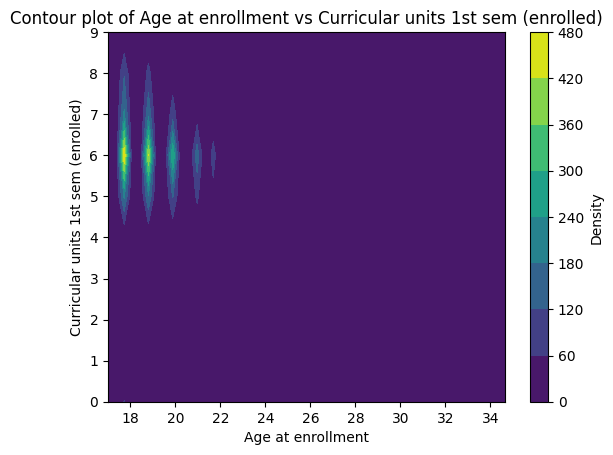

In [41]:
from matplotlib.ticker import MaxNLocator

# Define the bin edges for the x and y variables
x_edges = np.linspace(17, 35, 51)
y_edges = np.linspace(0, 10, 11)

# Create the X and Y arrays
X, Y = np.meshgrid(x_edges[:-1], y_edges[:-1])

# Calculate the density of data points
H, _, _ = np.histogram2d(x, y, bins=[x_edges, y_edges])
H = H.T

# Create a contour plot to show the relationship between the two variables and the target variable
fig, ax = plt.subplots()
ax.contourf(X, Y, H, cmap='viridis')
ax.set_xlabel('Age at enrollment')
ax.set_ylabel('Curricular units 1st sem (enrolled)')
ax.set_title('Contour plot of Age at enrollment vs Curricular units 1st sem (enrolled)')

# Add a colorbar to show the density of data points
cbar = fig.colorbar(ax.contourf(X, Y, H, cmap='viridis'))
cbar.ax.set_ylabel('Density')

# Customize the tick labels
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.yaxis.set_major_locator(MaxNLocator(integer=True))

plt.show()

# **EXPLAINABLE AI'S**

In [89]:
pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 2.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283835 sha256=ed86684f871bd84881d27c3a19a089812443fdc6d84fe92565d1496fb050cf5d
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


**LIME**

In [90]:
#LIME (Local Interpretable Model-agnostic Explanations):
#LIME explains individual predictions by approximating the model locally with an interpretable model, such as a linear regression model.

import lime
import lime.lime_tabular

# Split the dataset into features and target
X = df.drop('Target', axis=1)
y = df['Target']

# Train the model
model = RandomForestClassifier()
model.fit(X, y)

# Explain a single prediction
explainer = lime.lime_tabular.LimeTabularExplainer(X.values, feature_names=X.columns, class_names=['0', '1'])
explanation = explainer.explain_instance(X.iloc[0], model.predict_proba, num_features=5)
explanation.show_in_notebook(show_table=True)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


**SHAP**

In [92]:
pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.5/540.5 kB 2.8 MB/s eta 0:00:00


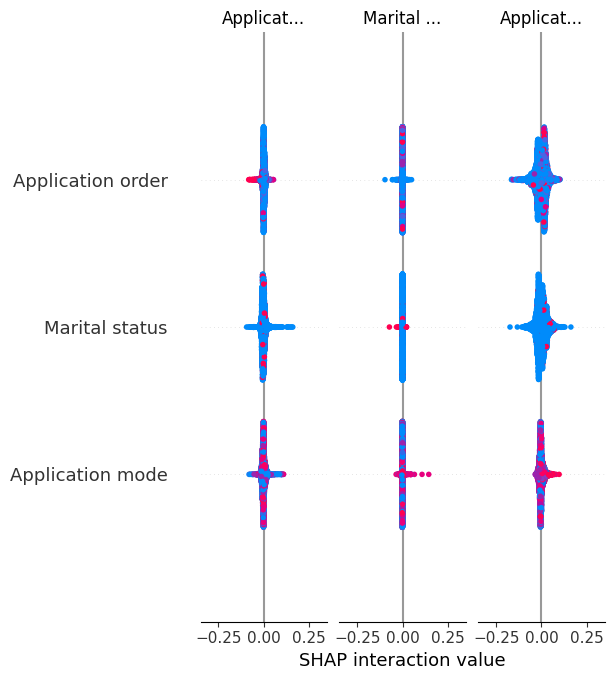

In [93]:
#SHAP (SHapley Additive exPlanations): SHAP values explain the contribution of each feature to the prediction.

import shap

# Train the model
model = RandomForestClassifier()
model.fit(X, y)

# Calculate SHAP values
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)

# Display the summary plot
shap.summary_plot(shap_values, X, X.columns)